# **Práctica 8: Fusion de datos**

Nombres:
* Mora González Alan Francisco
* Herrera Godina Diana Celeste

No. Cuenta:
* 113005901
* 316161927


Email:
* alanfmorag@gmail.com
* dayanceles@gmail.com

### **Contexto**

* La retinopatía diabética aparece como consecuencia del daño en los vasos sanguíneos de la retina (parte posterior del ojo). 
* El azúcar en la sangre, no controlado correctamente, es un factor de riesgo. Entre los síntomas comunes destacan: visión borrosa, visión oscura, dificultad para percibir los colores, y ceguera.

**Objetivo:** Hacer una fusión de datos a través de la media, mediana y un aproximador lineal.

**Fuente de datos**

Datos recolectados en los últimos años.

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline

### **I. Acceso a datos y selección de características**

#### **1) Acceso a los datos**

In [2]:
url = "https://raw.githubusercontent.com/alanmgg/Data-Mining/main/Datos/DiabeticRetinopathy.csv"
retinopatia = pd.read_csv(url)
retinopatia

,patient,patient.number,obs,health.status,group,f_000001,f_000002,f_000003,f_000004,f_000005,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,paciente151_1,151,1,health,none,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,paciente411hpf0.3hzmedian_6,411,6,health,none,201.462060,227.196312,239.527682,242.712595,233.877109,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,paciente237hpf0.3hzmedian_4,237,4,disorder,none,57.266926,42.895909,37.259729,34.940005,31.036661,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,paciente116hpf0.3hzmedian_7,116,7,health,none,229.556540,218.015928,229.962008,214.427812,169.474568,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,paciente131_2,131,2,health,none,94.251665,96.188890,101.315349,102.756134,99.327028,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,paciente396hpf0.3hzmedian_5,396,5,health,none,26.918454,30.309754,32.370351,33.266800,34.510788,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,paciente412hpf0.3hzmedian_3,412,3,health,none,444.511027,430.493455,419.294383,427.814583,464.004222,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,paciente398hpf0.3hzmedian_7,398,7,health,none,253.650671,337.009270,426.335102,487.426947,525.123416,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,paciente370hpf0.3hzmedian_6,370,6,health,none,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


In [3]:
retinopatia.drop(['patient', 'patient.number', 'obs', 'group'], axis=1, inplace=True)
retinopatia

,health.status,f_000001,f_000002,f_000003,f_000004,f_000005,f_000006,f_000007,f_000008,f_000009,...,f_000061,f_000062,f_000063,f_000064,f_000065,f_000066,f_000067,f_000068,f_000069,f_000070
0,health,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1901.665846,1542.094413,1235.418132,1055.299286,...,3.332748,3.480402,3.854307,5.245511,9.215420,15.686887,20.877630,21.301055,17.878146,13.799770
1,health,201.462060,227.196312,239.527682,242.712595,233.877109,210.513469,191.437958,202.668934,242.237323,...,15.576554,16.825167,18.315843,20.076293,21.848763,23.448133,24.781314,25.852985,26.772444,27.510021
2,disorder,57.266926,42.895909,37.259729,34.940005,31.036661,25.152557,19.968624,16.827274,14.809649,...,34.657351,34.727477,35.977187,38.361017,41.693322,45.194320,47.899705,49.562395,50.450740,50.533996
3,health,229.556540,218.015928,229.962008,214.427812,169.474568,117.856876,78.850049,60.246079,60.042319,...,18.014346,20.047497,22.536181,25.359234,28.353100,31.507935,34.888351,38.140906,40.915108,43.514155
4,health,94.251665,96.188890,101.315349,102.756134,99.327028,94.523127,90.872227,87.441905,81.699262,...,7.042471,7.696502,8.379038,8.982337,9.471419,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107,health,26.918454,30.309754,32.370351,33.266800,34.510788,36.818745,40.040679,44.653186,50.669628,...,3.341653,3.410566,3.541230,3.752837,3.991767,4.186375,4.322308,4.465974,4.699261,5.044514
1108,health,444.511027,430.493455,419.294383,427.814583,464.004222,503.705996,500.025801,444.127540,382.045806,...,14.687543,16.202893,17.692761,19.226280,21.524516,24.649297,26.917099,26.890498,25.170626,23.127421
1109,health,253.650671,337.009270,426.335102,487.426947,525.123416,560.300413,597.905585,627.652998,635.203600,...,2.039017,2.153674,2.299899,2.457559,2.662999,2.969399,3.374929,3.818873,4.224368,4.547494
1110,health,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1379.770024,1396.685578,1325.441130,1181.954549,...,23.274529,24.340751,25.133467,25.785277,26.281525,26.752091,27.452770,28.444717,29.522745,30.401168


In [4]:
print(retinopatia.groupby('health.status').size())

health.status
disorder    556
health      556
dtype: int64


### **Gráfica de los valores a fusionar**

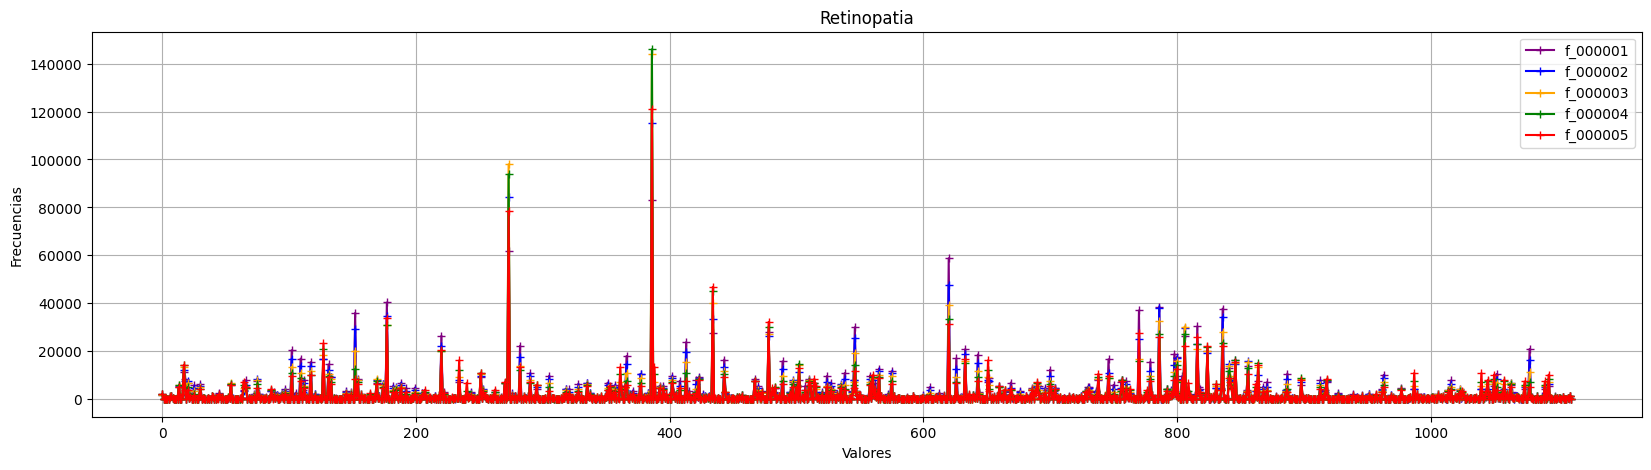

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(retinopatia['f_000001'], color='purple', marker='+', label='f_000001')
plt.plot(retinopatia['f_000002'], color='blue', marker='+', label='f_000002')
plt.plot(retinopatia['f_000003'], color='orange', marker='+', label='f_000003')
plt.plot(retinopatia['f_000004'], color='green', marker='+', label='f_000004')
plt.plot(retinopatia['f_000005'], color='red', marker='+', label='f_000005')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos de modo tradicional

In [15]:
fusion_1 = retinopatia.drop(columns = ['health.status'])
for item in fusion_1:
  if item != 'f_000001' and item != 'f_000002' and item != 'f_000003' and item != 'f_000004' and item != 'f_000005':
    fusion_1 = fusion_1.drop(columns = [item])
fusion_1

,f_000001,f_000002,f_000003,f_000004,f_000005
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161
1,201.462060,227.196312,239.527682,242.712595,233.877109
2,57.266926,42.895909,37.259729,34.940005,31.036661
3,229.556540,218.015928,229.962008,214.427812,169.474568
4,94.251665,96.188890,101.315349,102.756134,99.327028
...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788
1108,444.511027,430.493455,419.294383,427.814583,464.004222
1109,253.650671,337.009270,426.335102,487.426947,525.123416
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977


In [16]:
# En caso de tener valores nulos
fusion_1 = fusion_1.dropna()
fusion_1

,f_000001,f_000002,f_000003,f_000004,f_000005
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161
1,201.462060,227.196312,239.527682,242.712595,233.877109
2,57.266926,42.895909,37.259729,34.940005,31.036661
3,229.556540,218.015928,229.962008,214.427812,169.474568
4,94.251665,96.188890,101.315349,102.756134,99.327028
...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788
1108,444.511027,430.493455,419.294383,427.814583,464.004222
1109,253.650671,337.009270,426.335102,487.426947,525.123416
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977


In [17]:
#Promedio
promedio_simple = fusion_1.loc[: , 'f_000001':'f_000005']
fusion_1['Media'] = promedio_simple.mean(axis='columns')
fusion_1

,f_000001,f_000002,f_000003,f_000004,f_000005,Media
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1971.529086
1,201.462060,227.196312,239.527682,242.712595,233.877109,228.955152
2,57.266926,42.895909,37.259729,34.940005,31.036661,40.679846
3,229.556540,218.015928,229.962008,214.427812,169.474568,212.287371
4,94.251665,96.188890,101.315349,102.756134,99.327028,98.767813
...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,31.475229
1108,444.511027,430.493455,419.294383,427.814583,464.004222,437.223534
1109,253.650671,337.009270,426.335102,487.426947,525.123416,405.909081
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1313.014395


In [18]:
#Mediana
mediana = fusion_1.loc[: , 'f_000001':'f_000005']
fusion_1['Mediana'] = mediana.median(axis='columns')
fusion_1

,f_000001,f_000002,f_000003,f_000004,f_000005,Media,Mediana
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1971.529086,2000.402651
1,201.462060,227.196312,239.527682,242.712595,233.877109,228.955152,233.877109
2,57.266926,42.895909,37.259729,34.940005,31.036661,40.679846,37.259729
3,229.556540,218.015928,229.962008,214.427812,169.474568,212.287371,218.015928
4,94.251665,96.188890,101.315349,102.756134,99.327028,98.767813,99.327028
...,...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,31.475229,32.370351
1108,444.511027,430.493455,419.294383,427.814583,464.004222,437.223534,430.493455
1109,253.650671,337.009270,426.335102,487.426947,525.123416,405.909081,426.335102
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1313.014395,1320.569524


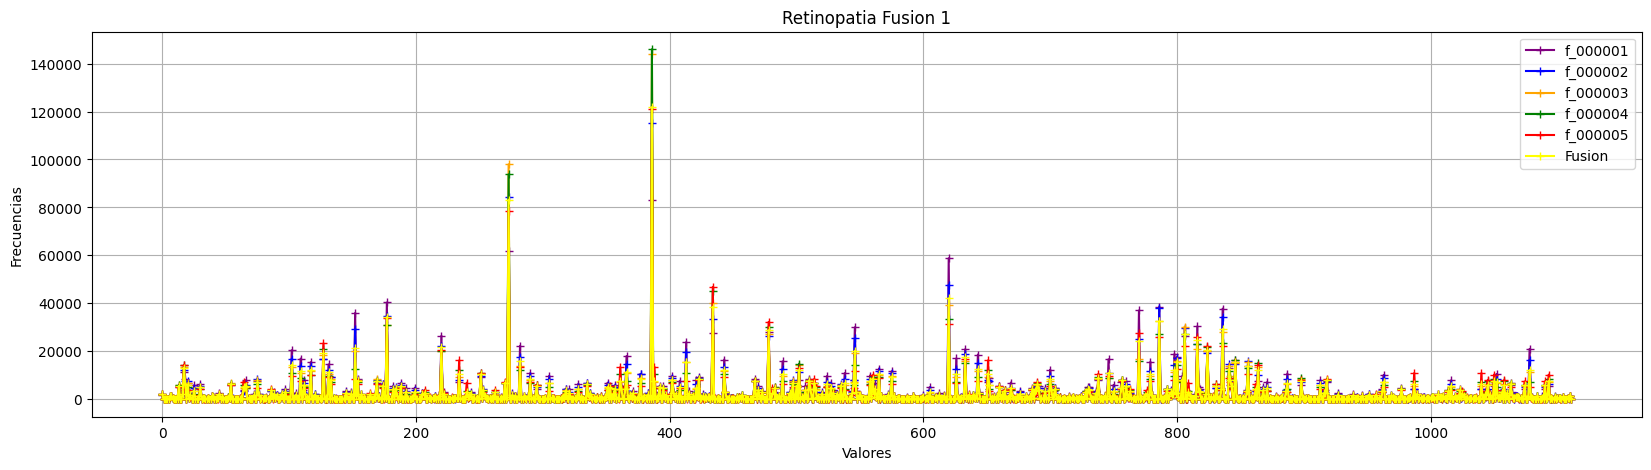

In [27]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_1['f_000001'], color='purple', marker='+', label='f_000001')
plt.plot(fusion_1['f_000002'], color='blue', marker='+', label='f_000002')
plt.plot(fusion_1['f_000003'], color='orange', marker='+', label='f_000003')
plt.plot(fusion_1['f_000004'], color='green', marker='+', label='f_000004')
plt.plot(fusion_1['f_000005'], color='red', marker='+', label='f_000005')
plt.plot(fusion_1['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 1')
plt.grid(True)
plt.legend()
plt.show()

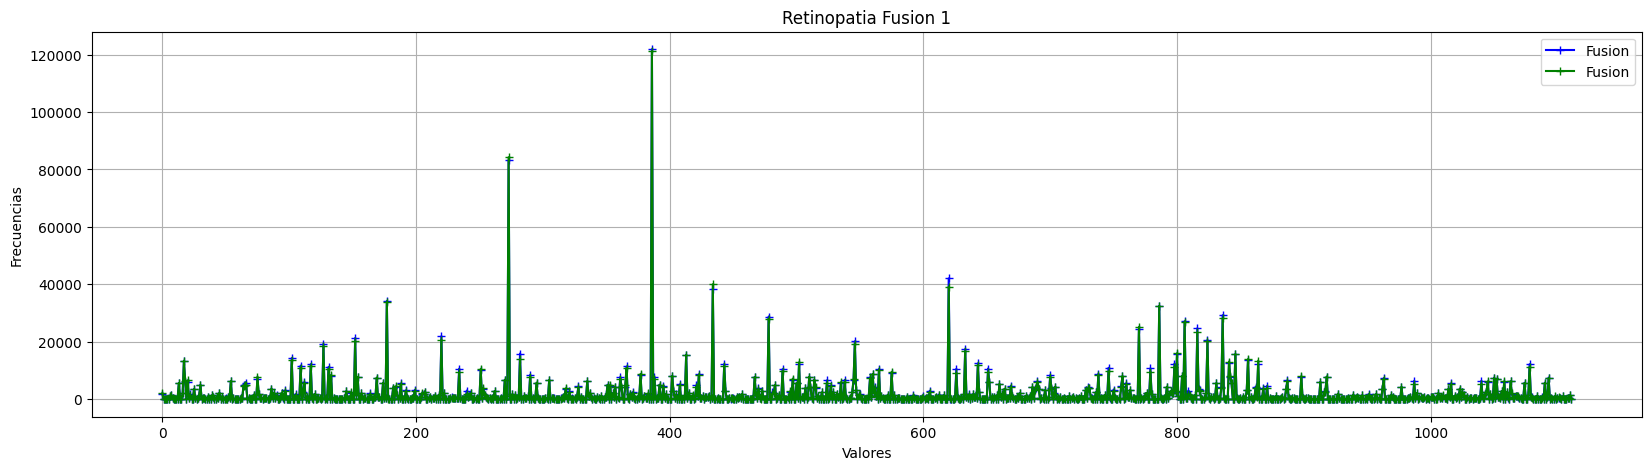

In [29]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_1['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_1['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 1')
plt.grid(True)
plt.legend()
plt.show()

In [22]:
fusion_2 = retinopatia.drop(columns = ['health.status'])
for item in fusion_2:
  if item != 'f_000006' and item != 'f_000007' and item != 'f_000008' and item != 'f_000009' and item != 'f_000010':
    fusion_2 = fusion_2.drop(columns = [item])
fusion_2

,f_000006,f_000007,f_000008,f_000009,f_000010
0,1901.665846,1542.094413,1235.418132,1055.299286,946.799508
1,210.513469,191.437958,202.668934,242.237323,281.191264
2,25.152557,19.968624,16.827274,14.809649,12.929315
3,117.856876,78.850049,60.246079,60.042319,69.885569
4,94.523127,90.872227,87.441905,81.699262,73.520821
...,...,...,...,...,...
1107,36.818745,40.040679,44.653186,50.669628,55.949850
1108,503.705996,500.025801,444.127540,382.045806,352.738378
1109,560.300413,597.905585,627.652998,635.203600,620.060143
1110,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330


In [23]:
# En caso de tener valores nulos
fusion_2 = fusion_2.dropna()
fusion_2

,f_000006,f_000007,f_000008,f_000009,f_000010
0,1901.665846,1542.094413,1235.418132,1055.299286,946.799508
1,210.513469,191.437958,202.668934,242.237323,281.191264
2,25.152557,19.968624,16.827274,14.809649,12.929315
3,117.856876,78.850049,60.246079,60.042319,69.885569
4,94.523127,90.872227,87.441905,81.699262,73.520821
...,...,...,...,...,...
1107,36.818745,40.040679,44.653186,50.669628,55.949850
1108,503.705996,500.025801,444.127540,382.045806,352.738378
1109,560.300413,597.905585,627.652998,635.203600,620.060143
1110,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330


In [24]:
#Promedio
promedio_simple = fusion_2.loc[: , 'f_000006':'f_000010']
fusion_2['Media'] = promedio_simple.mean(axis='columns')
fusion_2

,f_000006,f_000007,f_000008,f_000009,f_000010,Media
0,1901.665846,1542.094413,1235.418132,1055.299286,946.799508,1336.255437
1,210.513469,191.437958,202.668934,242.237323,281.191264,225.609790
2,25.152557,19.968624,16.827274,14.809649,12.929315,17.937484
3,117.856876,78.850049,60.246079,60.042319,69.885569,77.376178
4,94.523127,90.872227,87.441905,81.699262,73.520821,85.611468
...,...,...,...,...,...,...
1107,36.818745,40.040679,44.653186,50.669628,55.949850,45.626417
1108,503.705996,500.025801,444.127540,382.045806,352.738378,436.528704
1109,560.300413,597.905585,627.652998,635.203600,620.060143,608.224548
1110,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330,1262.193722


In [25]:
#Mediana
mediana = fusion_2.loc[: , 'f_000006':'f_000010']
fusion_2['Mediana'] = mediana.median(axis='columns')
fusion_2

,f_000006,f_000007,f_000008,f_000009,f_000010,Media,Mediana
0,1901.665846,1542.094413,1235.418132,1055.299286,946.799508,1336.255437,1235.418132
1,210.513469,191.437958,202.668934,242.237323,281.191264,225.609790,210.513469
2,25.152557,19.968624,16.827274,14.809649,12.929315,17.937484,16.827274
3,117.856876,78.850049,60.246079,60.042319,69.885569,77.376178,69.885569
4,94.523127,90.872227,87.441905,81.699262,73.520821,85.611468,87.441905
...,...,...,...,...,...,...,...
1107,36.818745,40.040679,44.653186,50.669628,55.949850,45.626417,44.653186
1108,503.705996,500.025801,444.127540,382.045806,352.738378,436.528704,444.127540
1109,560.300413,597.905585,627.652998,635.203600,620.060143,608.224548,620.060143
1110,1379.770024,1396.685578,1325.441130,1181.954549,1027.117330,1262.193722,1325.441130


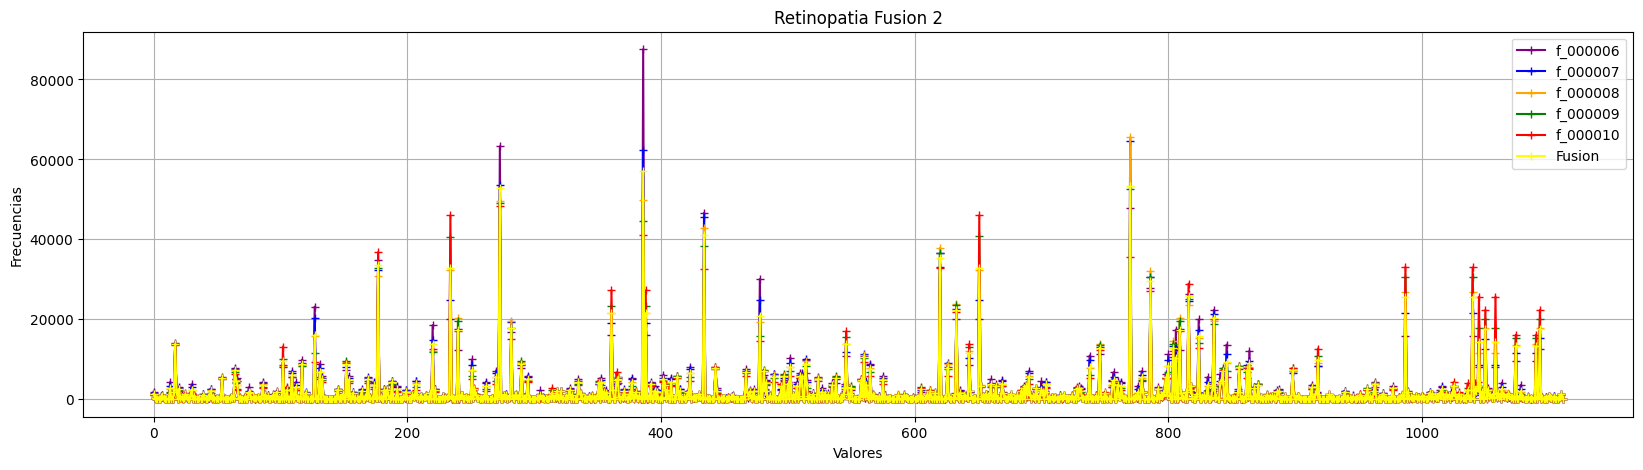

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_2['f_000006'], color='purple', marker='+', label='f_000006')
plt.plot(fusion_2['f_000007'], color='blue', marker='+', label='f_000007')
plt.plot(fusion_2['f_000008'], color='orange', marker='+', label='f_000008')
plt.plot(fusion_2['f_000009'], color='green', marker='+', label='f_000009')
plt.plot(fusion_2['f_000010'], color='red', marker='+', label='f_000010')
plt.plot(fusion_2['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 2')
plt.grid(True)
plt.legend()
plt.show()

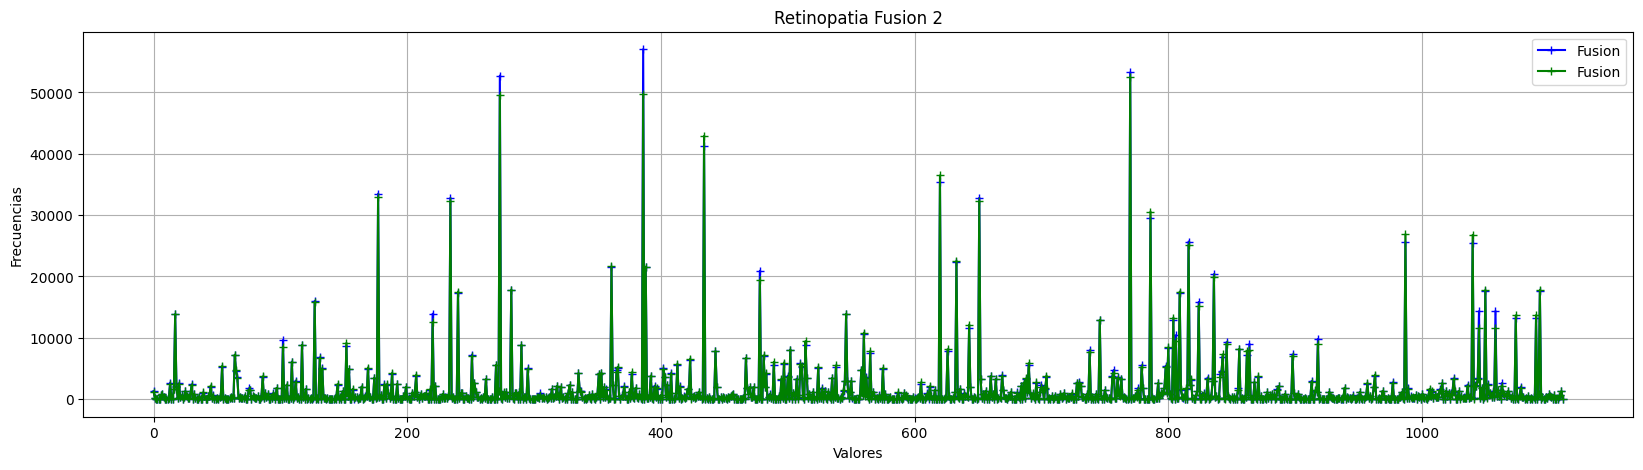

In [30]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_2['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_2['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 2')
plt.grid(True)
plt.legend()
plt.show()

In [31]:
fusion_3 = retinopatia.drop(columns = ['health.status'])
for item in fusion_3:
  if item != 'f_000011' and item != 'f_000012' and item != 'f_000013' and item != 'f_000014' and item != 'f_000015':
    fusion_3 = fusion_3.drop(columns = [item])
fusion_3

,f_000011,f_000012,f_000013,f_000014,f_000015
0,844.858268,728.425854,609.453069,500.332093,407.896819
1,296.698397,285.876827,257.446683,226.145538,207.001712
2,11.138035,9.742965,8.876482,8.365923,7.786832
3,79.388782,80.679064,72.065609,57.307051,41.642385
4,66.385228,64.079666,67.092711,72.462837,76.764494
...,...,...,...,...,...
1107,57.549711,54.059897,46.571985,38.807834,35.572886
1108,354.442472,363.441033,359.520800,347.834694,348.723327
1109,595.371016,558.773758,502.500023,451.927291,434.594411
1110,936.954768,946.249384,1007.088078,1057.221474,1071.055890


In [32]:
# En caso de tener valores nulos
fusion_3 = fusion_3.dropna()
fusion_3

,f_000011,f_000012,f_000013,f_000014,f_000015
0,844.858268,728.425854,609.453069,500.332093,407.896819
1,296.698397,285.876827,257.446683,226.145538,207.001712
2,11.138035,9.742965,8.876482,8.365923,7.786832
3,79.388782,80.679064,72.065609,57.307051,41.642385
4,66.385228,64.079666,67.092711,72.462837,76.764494
...,...,...,...,...,...
1107,57.549711,54.059897,46.571985,38.807834,35.572886
1108,354.442472,363.441033,359.520800,347.834694,348.723327
1109,595.371016,558.773758,502.500023,451.927291,434.594411
1110,936.954768,946.249384,1007.088078,1057.221474,1071.055890


In [33]:
#Promedio
promedio_simple = fusion_3.loc[: , 'f_000011':'f_000015']
fusion_3['Media'] = promedio_simple.mean(axis='columns')
fusion_3

,f_000011,f_000012,f_000013,f_000014,f_000015,Media
0,844.858268,728.425854,609.453069,500.332093,407.896819,618.193221
1,296.698397,285.876827,257.446683,226.145538,207.001712,254.633831
2,11.138035,9.742965,8.876482,8.365923,7.786832,9.182048
3,79.388782,80.679064,72.065609,57.307051,41.642385,66.216578
4,66.385228,64.079666,67.092711,72.462837,76.764494,69.356987
...,...,...,...,...,...,...
1107,57.549711,54.059897,46.571985,38.807834,35.572886,46.512463
1108,354.442472,363.441033,359.520800,347.834694,348.723327,354.792465
1109,595.371016,558.773758,502.500023,451.927291,434.594411,508.633300
1110,936.954768,946.249384,1007.088078,1057.221474,1071.055890,1003.713919


In [34]:
#Mediana
mediana = fusion_3.loc[: , 'f_000011':'f_000015']
fusion_3['Mediana'] = mediana.median(axis='columns')
fusion_3

,f_000011,f_000012,f_000013,f_000014,f_000015,Media,Mediana
0,844.858268,728.425854,609.453069,500.332093,407.896819,618.193221,609.453069
1,296.698397,285.876827,257.446683,226.145538,207.001712,254.633831,257.446683
2,11.138035,9.742965,8.876482,8.365923,7.786832,9.182048,8.876482
3,79.388782,80.679064,72.065609,57.307051,41.642385,66.216578,72.065609
4,66.385228,64.079666,67.092711,72.462837,76.764494,69.356987,67.092711
...,...,...,...,...,...,...,...
1107,57.549711,54.059897,46.571985,38.807834,35.572886,46.512463,46.571985
1108,354.442472,363.441033,359.520800,347.834694,348.723327,354.792465,354.442472
1109,595.371016,558.773758,502.500023,451.927291,434.594411,508.633300,502.500023
1110,936.954768,946.249384,1007.088078,1057.221474,1071.055890,1003.713919,1007.088078


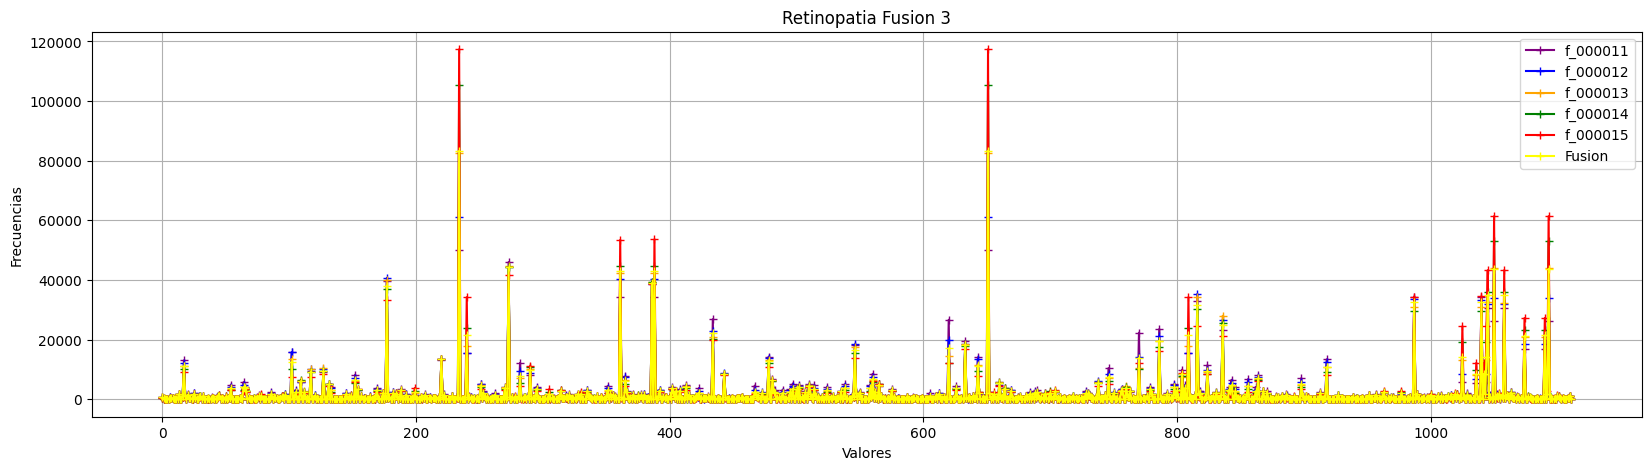

In [35]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_3['f_000011'], color='purple', marker='+', label='f_000011')
plt.plot(fusion_3['f_000012'], color='blue', marker='+', label='f_000012')
plt.plot(fusion_3['f_000013'], color='orange', marker='+', label='f_000013')
plt.plot(fusion_3['f_000014'], color='green', marker='+', label='f_000014')
plt.plot(fusion_3['f_000015'], color='red', marker='+', label='f_000015')
plt.plot(fusion_3['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 3')
plt.grid(True)
plt.legend()
plt.show()

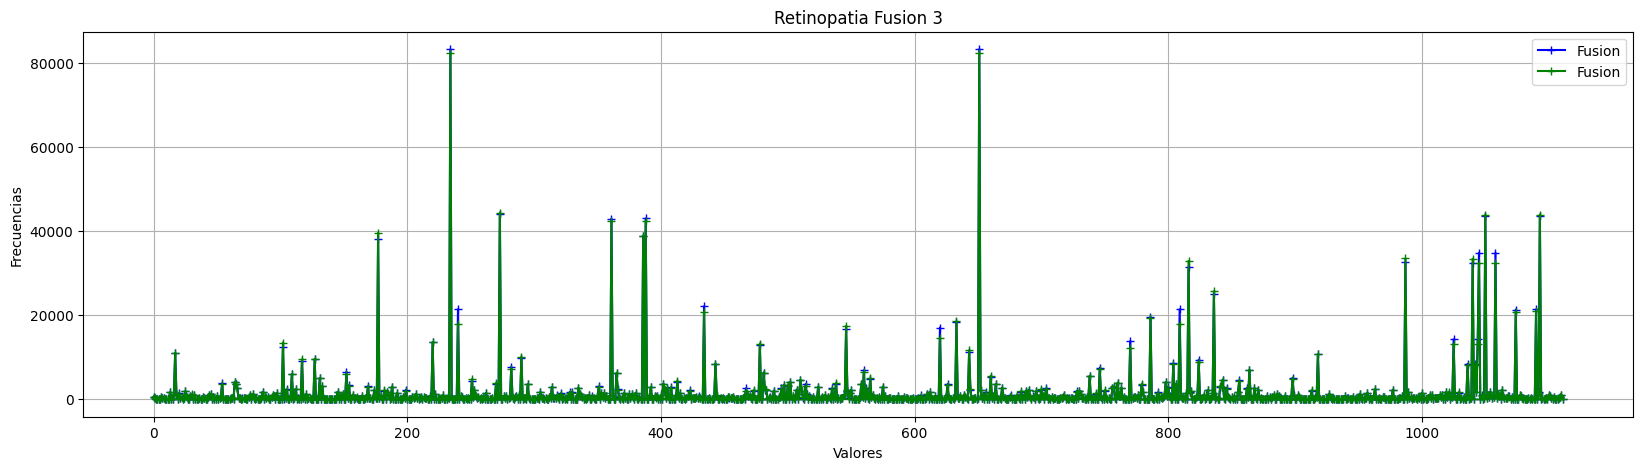

In [36]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_3['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_3['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 3')
plt.grid(True)
plt.legend()
plt.show()

In [37]:
fusion_4 = retinopatia.drop(columns = ['health.status'])
for item in fusion_4:
  if item != 'f_000016' and item != 'f_000017' and item != 'f_000018' and item != 'f_000019' and item != 'f_000020':
    fusion_4 = fusion_4.drop(columns = [item])
fusion_4

,f_000016,f_000017,f_000018,f_000019,f_000020
0,339.363237,289.386915,244.726792,201.258423,162.952307
1,201.898404,196.340896,178.548004,155.156536,142.621630
2,6.900270,5.967952,5.327239,4.945209,4.781511
3,29.109345,21.639552,19.247185,20.942143,25.132408
4,78.705752,78.521821,76.804686,75.019296,74.403200
...,...,...,...,...,...
1107,38.730594,44.571258,46.797436,42.649011,34.903603
1108,368.799326,401.500590,429.746948,427.287677,391.232122
1109,433.102648,415.163270,376.338891,330.832514,289.162262
1110,1033.952625,944.924803,830.006591,718.899455,634.213817


In [38]:
# En caso de tener valores nulos
fusion_4 = fusion_4.dropna()
fusion_4

,f_000016,f_000017,f_000018,f_000019,f_000020
0,339.363237,289.386915,244.726792,201.258423,162.952307
1,201.898404,196.340896,178.548004,155.156536,142.621630
2,6.900270,5.967952,5.327239,4.945209,4.781511
3,29.109345,21.639552,19.247185,20.942143,25.132408
4,78.705752,78.521821,76.804686,75.019296,74.403200
...,...,...,...,...,...
1107,38.730594,44.571258,46.797436,42.649011,34.903603
1108,368.799326,401.500590,429.746948,427.287677,391.232122
1109,433.102648,415.163270,376.338891,330.832514,289.162262
1110,1033.952625,944.924803,830.006591,718.899455,634.213817


In [39]:
#Promedio
promedio_simple = fusion_4.loc[: , 'f_000016':'f_000020']
fusion_4['Media'] = promedio_simple.mean(axis='columns')
fusion_4

,f_000016,f_000017,f_000018,f_000019,f_000020,Media
0,339.363237,289.386915,244.726792,201.258423,162.952307,247.537535
1,201.898404,196.340896,178.548004,155.156536,142.621630,174.913094
2,6.900270,5.967952,5.327239,4.945209,4.781511,5.584436
3,29.109345,21.639552,19.247185,20.942143,25.132408,23.214127
4,78.705752,78.521821,76.804686,75.019296,74.403200,76.690951
...,...,...,...,...,...,...
1107,38.730594,44.571258,46.797436,42.649011,34.903603,41.530381
1108,368.799326,401.500590,429.746948,427.287677,391.232122,403.713333
1109,433.102648,415.163270,376.338891,330.832514,289.162262,368.919917
1110,1033.952625,944.924803,830.006591,718.899455,634.213817,832.399458


In [40]:
#Mediana
mediana = fusion_4.loc[: , 'f_000016':'f_000020']
fusion_4['Mediana'] = mediana.median(axis='columns')
fusion_4

,f_000016,f_000017,f_000018,f_000019,f_000020,Media,Mediana
0,339.363237,289.386915,244.726792,201.258423,162.952307,247.537535,244.726792
1,201.898404,196.340896,178.548004,155.156536,142.621630,174.913094,178.548004
2,6.900270,5.967952,5.327239,4.945209,4.781511,5.584436,5.327239
3,29.109345,21.639552,19.247185,20.942143,25.132408,23.214127,21.639552
4,78.705752,78.521821,76.804686,75.019296,74.403200,76.690951,76.804686
...,...,...,...,...,...,...,...
1107,38.730594,44.571258,46.797436,42.649011,34.903603,41.530381,42.649011
1108,368.799326,401.500590,429.746948,427.287677,391.232122,403.713333,401.500590
1109,433.102648,415.163270,376.338891,330.832514,289.162262,368.919917,376.338891
1110,1033.952625,944.924803,830.006591,718.899455,634.213817,832.399458,830.006591


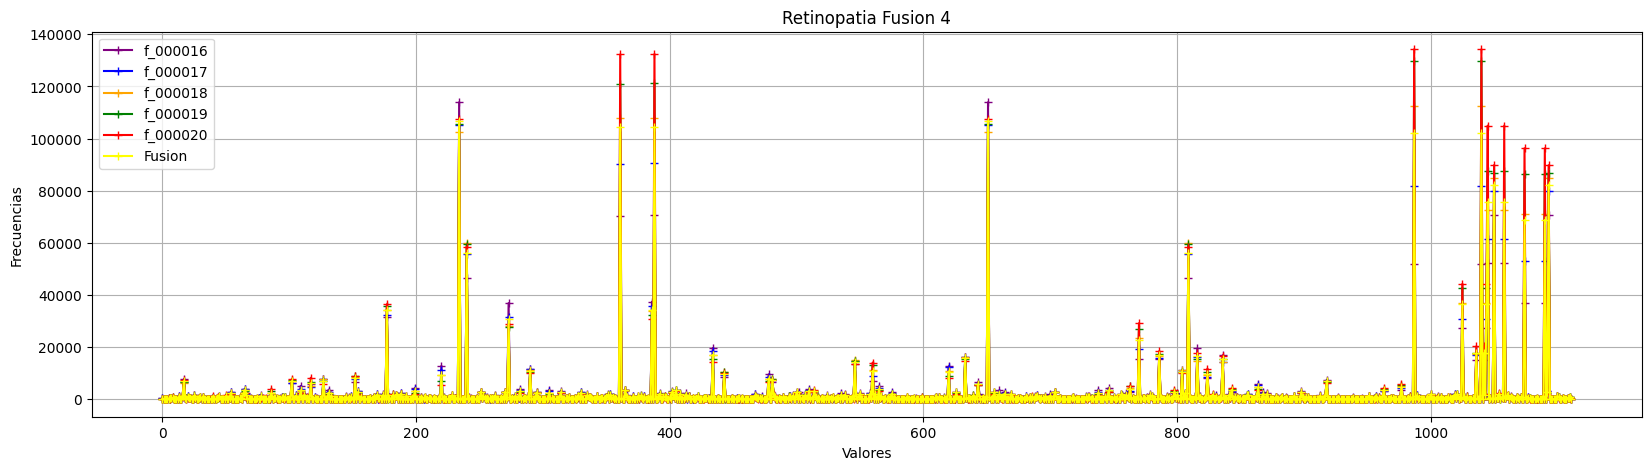

In [41]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_4['f_000016'], color='purple', marker='+', label='f_000016')
plt.plot(fusion_4['f_000017'], color='blue', marker='+', label='f_000017')
plt.plot(fusion_4['f_000018'], color='orange', marker='+', label='f_000018')
plt.plot(fusion_4['f_000019'], color='green', marker='+', label='f_000019')
plt.plot(fusion_4['f_000020'], color='red', marker='+', label='f_000020')
plt.plot(fusion_4['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 4')
plt.grid(True)
plt.legend()
plt.show()

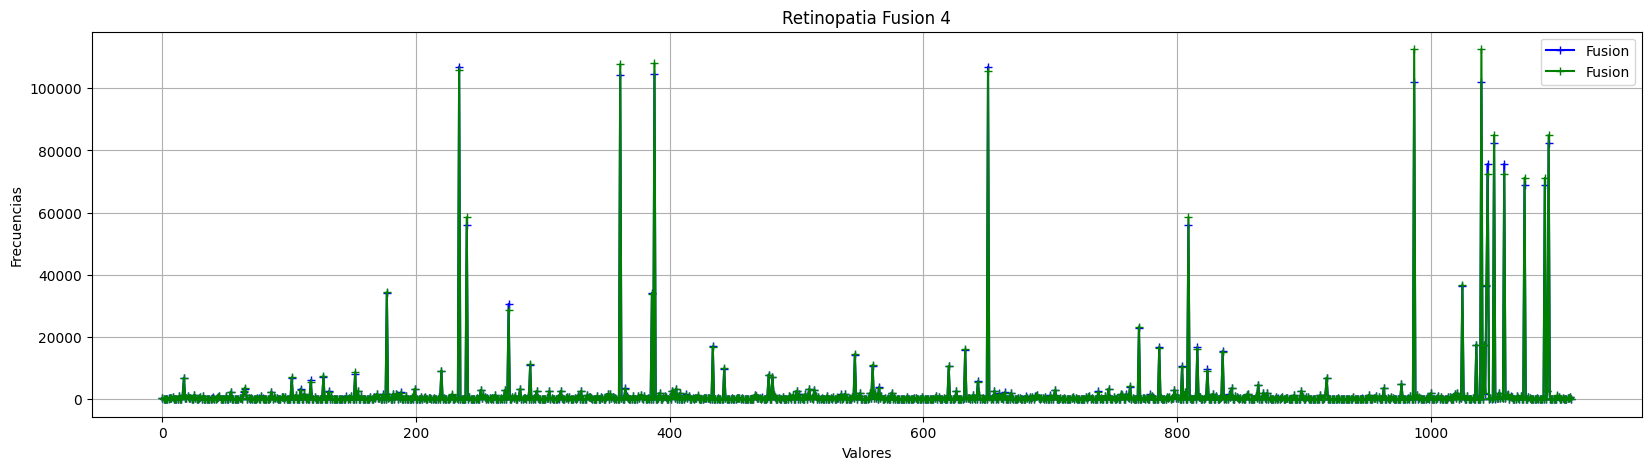

In [42]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_4['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_4['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 4')
plt.grid(True)
plt.legend()
plt.show()

In [43]:
fusion_5 = retinopatia.drop(columns = ['health.status'])
for item in fusion_5:
  if item != 'f_000021' and item != 'f_000022' and item != 'f_000023' and item != 'f_000024' and item != 'f_000025':
    fusion_5 = fusion_5.drop(columns = [item])
fusion_5

,f_000021,f_000022,f_000023,f_000024,f_000025
0,133.676555,112.038357,93.279650,74.981660,58.278427
1,146.568303,155.910107,157.915036,150.982688,142.286849
2,5.057278,5.679998,6.025778,5.697117,4.954526
3,29.220098,30.662914,29.012680,25.736764,22.265043
4,74.089783,72.798234,71.127981,70.011102,68.678449
...,...,...,...,...,...
1107,28.053109,24.183568,22.337261,20.539195,17.896465
1108,350.849196,330.834355,327.438235,322.869786,304.104002
1109,254.576442,228.567699,208.697420,185.926674,156.515790
1110,585.882022,556.561048,519.319148,467.547105,409.205400


In [44]:
# En caso de tener valores nulos
fusion_5 = fusion_5.dropna()
fusion_5

,f_000021,f_000022,f_000023,f_000024,f_000025
0,133.676555,112.038357,93.279650,74.981660,58.278427
1,146.568303,155.910107,157.915036,150.982688,142.286849
2,5.057278,5.679998,6.025778,5.697117,4.954526
3,29.220098,30.662914,29.012680,25.736764,22.265043
4,74.089783,72.798234,71.127981,70.011102,68.678449
...,...,...,...,...,...
1107,28.053109,24.183568,22.337261,20.539195,17.896465
1108,350.849196,330.834355,327.438235,322.869786,304.104002
1109,254.576442,228.567699,208.697420,185.926674,156.515790
1110,585.882022,556.561048,519.319148,467.547105,409.205400


In [45]:
#Promedio
promedio_simple = fusion_5.loc[: , 'f_000021':'f_000025']
fusion_5['Media'] = promedio_simple.mean(axis='columns')
fusion_5

,f_000021,f_000022,f_000023,f_000024,f_000025,Media
0,133.676555,112.038357,93.279650,74.981660,58.278427,94.450930
1,146.568303,155.910107,157.915036,150.982688,142.286849,150.732596
2,5.057278,5.679998,6.025778,5.697117,4.954526,5.482939
3,29.220098,30.662914,29.012680,25.736764,22.265043,27.379500
4,74.089783,72.798234,71.127981,70.011102,68.678449,71.341109
...,...,...,...,...,...,...
1107,28.053109,24.183568,22.337261,20.539195,17.896465,22.601920
1108,350.849196,330.834355,327.438235,322.869786,304.104002,327.219115
1109,254.576442,228.567699,208.697420,185.926674,156.515790,206.856805
1110,585.882022,556.561048,519.319148,467.547105,409.205400,507.702945


In [46]:
#Mediana
mediana = fusion_5.loc[: , 'f_000021':'f_000025']
fusion_5['Mediana'] = mediana.median(axis='columns')
fusion_5

,f_000021,f_000022,f_000023,f_000024,f_000025,Media,Mediana
0,133.676555,112.038357,93.279650,74.981660,58.278427,94.450930,93.279650
1,146.568303,155.910107,157.915036,150.982688,142.286849,150.732596,150.982688
2,5.057278,5.679998,6.025778,5.697117,4.954526,5.482939,5.679998
3,29.220098,30.662914,29.012680,25.736764,22.265043,27.379500,29.012680
4,74.089783,72.798234,71.127981,70.011102,68.678449,71.341109,71.127981
...,...,...,...,...,...,...,...
1107,28.053109,24.183568,22.337261,20.539195,17.896465,22.601920,22.337261
1108,350.849196,330.834355,327.438235,322.869786,304.104002,327.219115,327.438235
1109,254.576442,228.567699,208.697420,185.926674,156.515790,206.856805,208.697420
1110,585.882022,556.561048,519.319148,467.547105,409.205400,507.702945,519.319148


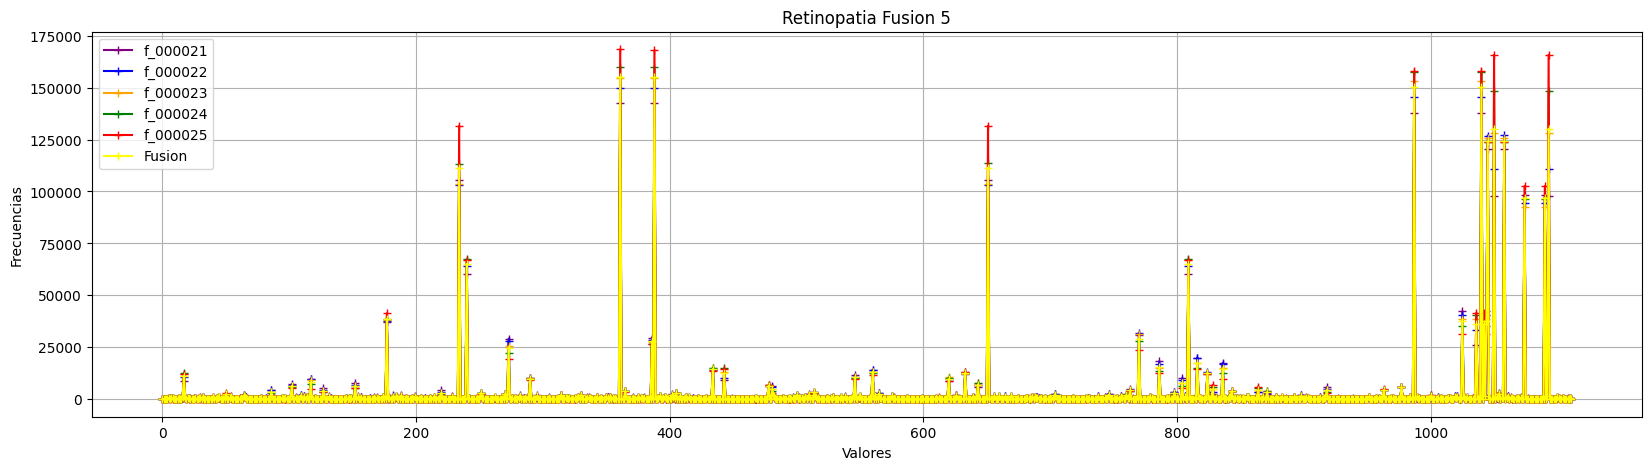

In [47]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_5['f_000021'], color='purple', marker='+', label='f_000021')
plt.plot(fusion_5['f_000022'], color='blue', marker='+', label='f_000022')
plt.plot(fusion_5['f_000023'], color='orange', marker='+', label='f_000023')
plt.plot(fusion_5['f_000024'], color='green', marker='+', label='f_000024')
plt.plot(fusion_5['f_000025'], color='red', marker='+', label='f_000025')
plt.plot(fusion_5['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 5')
plt.grid(True)
plt.legend()
plt.show()

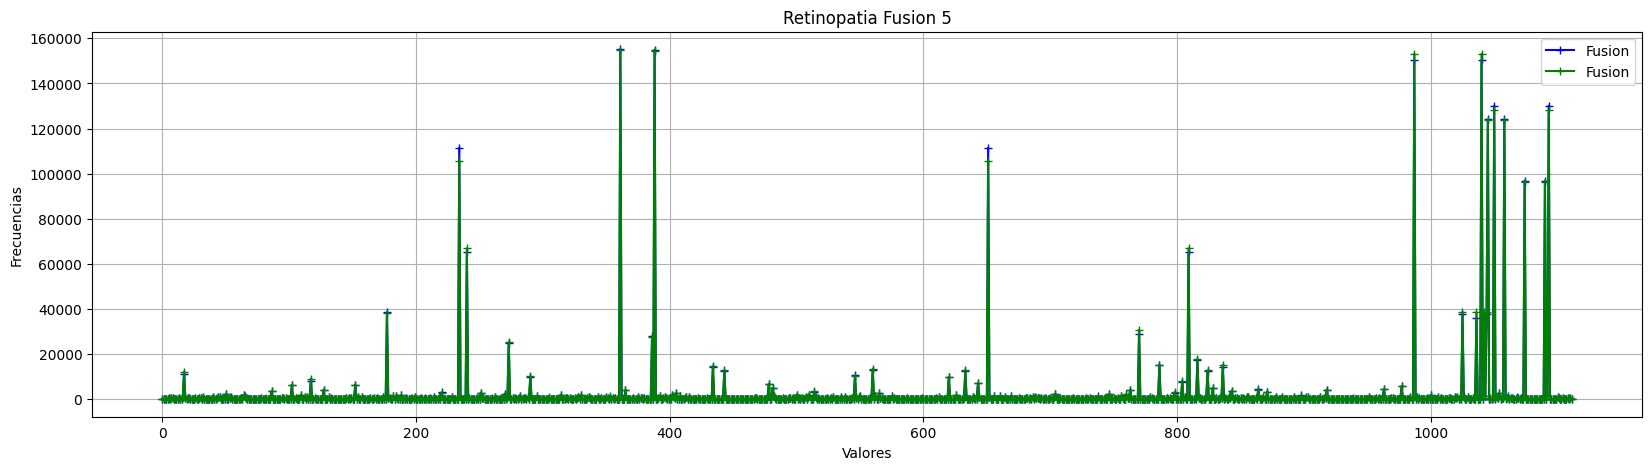

In [49]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_5['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_5['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 5')
plt.grid(True)
plt.legend()
plt.show()

In [50]:
fusion_6 = retinopatia.drop(columns = ['health.status'])
for item in fusion_6:
  if item != 'f_000026' and item != 'f_000027' and item != 'f_000028' and item != 'f_000029' and item != 'f_000030':
    fusion_6 = fusion_6.drop(columns = [item])
fusion_6

,f_000026,f_000027,f_000028,f_000029,f_000030
0,45.448552,36.914555,30.600818,24.646134,19.140727
1,135.463473,125.444937,108.089382,87.318180,70.286577
2,4.283820,3.910029,3.711877,3.454450,3.054757
3,19.155720,16.496276,14.167197,12.158485,10.701507
4,66.050105,62.546331,59.045917,55.651853,52.390129
...,...,...,...,...,...
1107,14.976569,12.706667,11.183598,9.840277,8.414779
1108,268.471296,226.697728,192.982593,170.351006,152.586046
1109,127.892852,106.340958,89.740237,74.360602,60.337839
1110,352.706683,306.296378,271.466008,240.176391,205.453303


In [51]:
# En caso de tener valores nulos
fusion_6 = fusion_6.dropna()
fusion_6

,f_000026,f_000027,f_000028,f_000029,f_000030
0,45.448552,36.914555,30.600818,24.646134,19.140727
1,135.463473,125.444937,108.089382,87.318180,70.286577
2,4.283820,3.910029,3.711877,3.454450,3.054757
3,19.155720,16.496276,14.167197,12.158485,10.701507
4,66.050105,62.546331,59.045917,55.651853,52.390129
...,...,...,...,...,...
1107,14.976569,12.706667,11.183598,9.840277,8.414779
1108,268.471296,226.697728,192.982593,170.351006,152.586046
1109,127.892852,106.340958,89.740237,74.360602,60.337839
1110,352.706683,306.296378,271.466008,240.176391,205.453303


In [52]:
#Promedio
promedio_simple = fusion_6.loc[: , 'f_000026':'f_000030']
fusion_6['Media'] = promedio_simple.mean(axis='columns')
fusion_6

,f_000026,f_000027,f_000028,f_000029,f_000030,Media
0,45.448552,36.914555,30.600818,24.646134,19.140727,31.350157
1,135.463473,125.444937,108.089382,87.318180,70.286577,105.320510
2,4.283820,3.910029,3.711877,3.454450,3.054757,3.682987
3,19.155720,16.496276,14.167197,12.158485,10.701507,14.535837
4,66.050105,62.546331,59.045917,55.651853,52.390129,59.136867
...,...,...,...,...,...,...
1107,14.976569,12.706667,11.183598,9.840277,8.414779,11.424378
1108,268.471296,226.697728,192.982593,170.351006,152.586046,202.217734
1109,127.892852,106.340958,89.740237,74.360602,60.337839,91.734498
1110,352.706683,306.296378,271.466008,240.176391,205.453303,275.219752


In [53]:
#Mediana
mediana = fusion_6.loc[: , 'f_000026':'f_000030']
fusion_6['Mediana'] = mediana.median(axis='columns')
fusion_6

,f_000026,f_000027,f_000028,f_000029,f_000030,Media,Mediana
0,45.448552,36.914555,30.600818,24.646134,19.140727,31.350157,30.600818
1,135.463473,125.444937,108.089382,87.318180,70.286577,105.320510,108.089382
2,4.283820,3.910029,3.711877,3.454450,3.054757,3.682987,3.711877
3,19.155720,16.496276,14.167197,12.158485,10.701507,14.535837,14.167197
4,66.050105,62.546331,59.045917,55.651853,52.390129,59.136867,59.045917
...,...,...,...,...,...,...,...
1107,14.976569,12.706667,11.183598,9.840277,8.414779,11.424378,11.183598
1108,268.471296,226.697728,192.982593,170.351006,152.586046,202.217734,192.982593
1109,127.892852,106.340958,89.740237,74.360602,60.337839,91.734498,89.740237
1110,352.706683,306.296378,271.466008,240.176391,205.453303,275.219752,271.466008


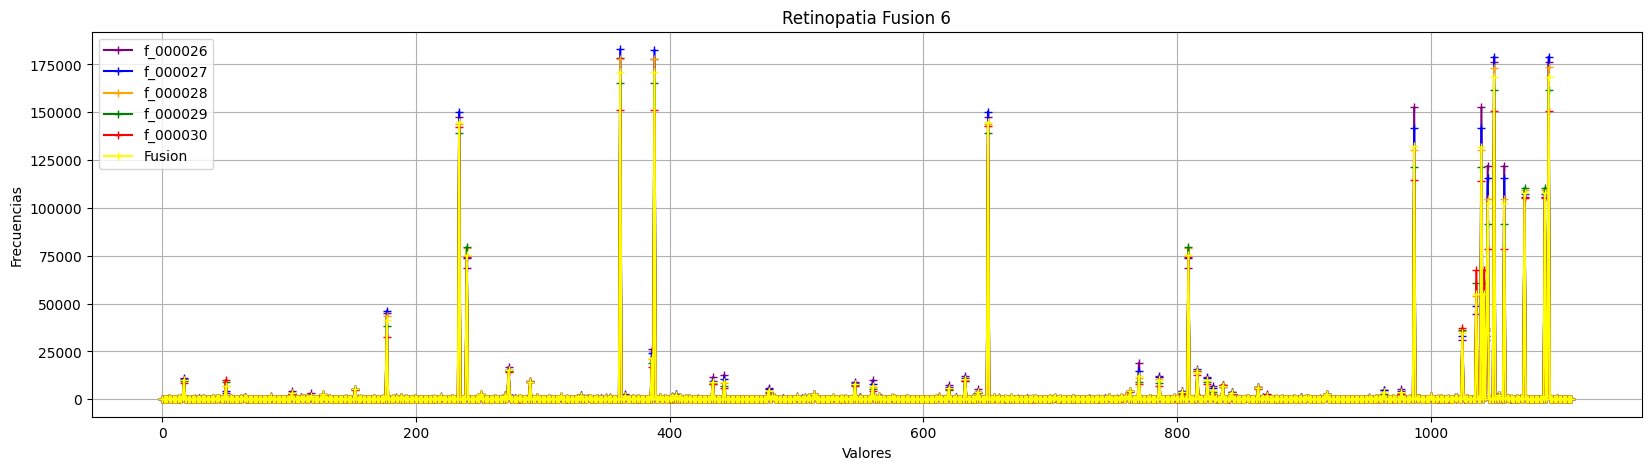

In [54]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_6['f_000026'], color='purple', marker='+', label='f_000026')
plt.plot(fusion_6['f_000027'], color='blue', marker='+', label='f_000027')
plt.plot(fusion_6['f_000028'], color='orange', marker='+', label='f_000028')
plt.plot(fusion_6['f_000029'], color='green', marker='+', label='f_000029')
plt.plot(fusion_6['f_000030'], color='red', marker='+', label='f_000030')
plt.plot(fusion_6['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 6')
plt.grid(True)
plt.legend()
plt.show()

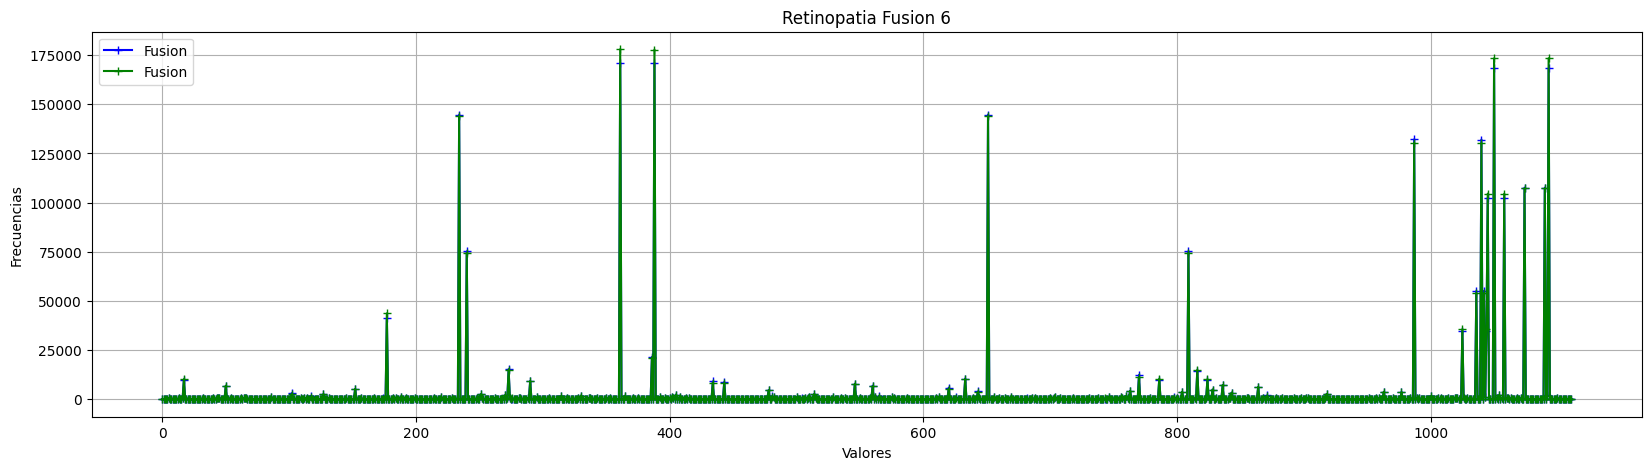

In [55]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_6['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_6['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 6')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
fusion_7 = retinopatia.drop(columns = ['health.status'])
for item in fusion_7:
  if item != 'f_000031' and item != 'f_000032' and item != 'f_000033' and item != 'f_000034' and item != 'f_000035':
    fusion_7 = fusion_7.drop(columns = [item])
fusion_7

,f_000031,f_000032,f_000033,f_000034,f_000035
0,14.852367,11.871760,9.802437,8.404906,7.730225
1,59.985605,54.049079,48.652176,42.135513,35.254341
2,2.613416,2.274479,2.082657,1.965735,1.844753
3,9.752962,8.880998,7.820956,6.711140,5.870779
4,49.584232,47.352478,45.646274,44.447569,43.517250
...,...,...,...,...,...
1107,7.082412,6.002918,5.213868,4.678405,4.254761
1108,133.830701,112.874377,92.029458,73.727974,58.201608
1109,49.315054,41.361256,35.249466,30.155638,25.947174
1110,167.683163,131.448936,101.601347,81.257228,70.290209


In [57]:
# En caso de tener valores nulos
fusion_7 = fusion_7.dropna()
fusion_7

,f_000031,f_000032,f_000033,f_000034,f_000035
0,14.852367,11.871760,9.802437,8.404906,7.730225
1,59.985605,54.049079,48.652176,42.135513,35.254341
2,2.613416,2.274479,2.082657,1.965735,1.844753
3,9.752962,8.880998,7.820956,6.711140,5.870779
4,49.584232,47.352478,45.646274,44.447569,43.517250
...,...,...,...,...,...
1107,7.082412,6.002918,5.213868,4.678405,4.254761
1108,133.830701,112.874377,92.029458,73.727974,58.201608
1109,49.315054,41.361256,35.249466,30.155638,25.947174
1110,167.683163,131.448936,101.601347,81.257228,70.290209


In [58]:
#Promedio
promedio_simple = fusion_7.loc[: , 'f_000031':'f_000035']
fusion_7['Media'] = promedio_simple.mean(axis='columns')
fusion_7

,f_000031,f_000032,f_000033,f_000034,f_000035,Media
0,14.852367,11.871760,9.802437,8.404906,7.730225,10.532339
1,59.985605,54.049079,48.652176,42.135513,35.254341,48.015343
2,2.613416,2.274479,2.082657,1.965735,1.844753,2.156208
3,9.752962,8.880998,7.820956,6.711140,5.870779,7.807367
4,49.584232,47.352478,45.646274,44.447569,43.517250,46.109561
...,...,...,...,...,...,...
1107,7.082412,6.002918,5.213868,4.678405,4.254761,5.446473
1108,133.830701,112.874377,92.029458,73.727974,58.201608,94.132824
1109,49.315054,41.361256,35.249466,30.155638,25.947174,36.405718
1110,167.683163,131.448936,101.601347,81.257228,70.290209,110.456177


In [59]:
#Mediana
mediana = fusion_7.loc[: , 'f_000031':'f_000035']
fusion_7['Mediana'] = mediana.median(axis='columns')
fusion_7

,f_000031,f_000032,f_000033,f_000034,f_000035,Media,Mediana
0,14.852367,11.871760,9.802437,8.404906,7.730225,10.532339,9.802437
1,59.985605,54.049079,48.652176,42.135513,35.254341,48.015343,48.652176
2,2.613416,2.274479,2.082657,1.965735,1.844753,2.156208,2.082657
3,9.752962,8.880998,7.820956,6.711140,5.870779,7.807367,7.820956
4,49.584232,47.352478,45.646274,44.447569,43.517250,46.109561,45.646274
...,...,...,...,...,...,...,...
1107,7.082412,6.002918,5.213868,4.678405,4.254761,5.446473,5.213868
1108,133.830701,112.874377,92.029458,73.727974,58.201608,94.132824,92.029458
1109,49.315054,41.361256,35.249466,30.155638,25.947174,36.405718,35.249466
1110,167.683163,131.448936,101.601347,81.257228,70.290209,110.456177,101.601347


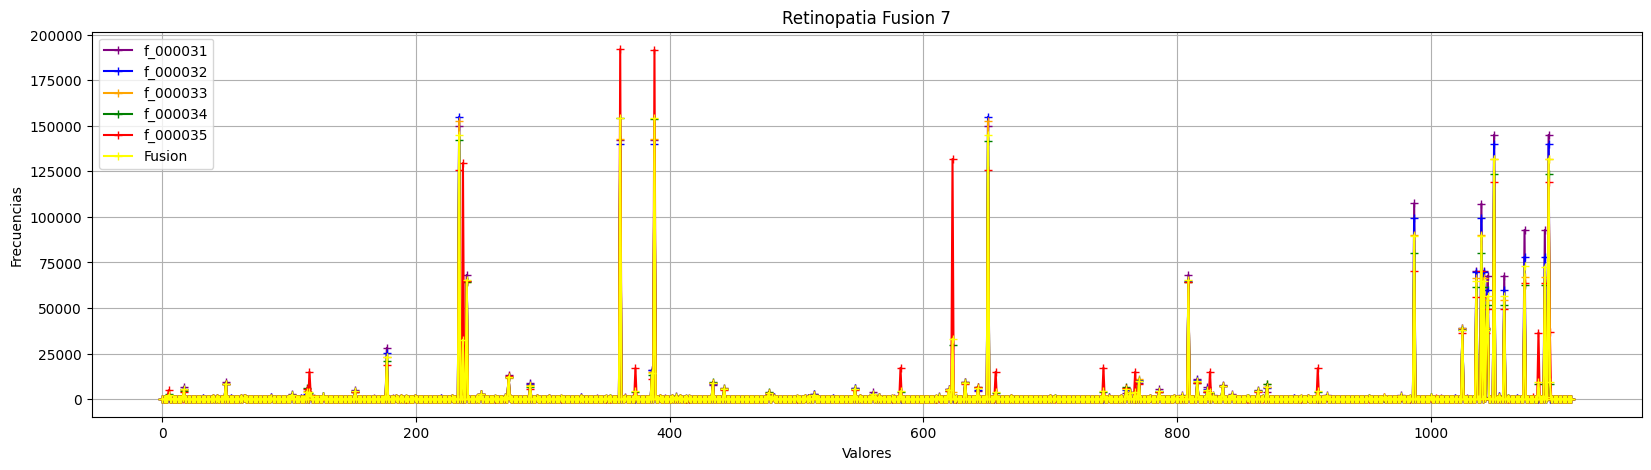

In [60]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_7['f_000031'], color='purple', marker='+', label='f_000031')
plt.plot(fusion_7['f_000032'], color='blue', marker='+', label='f_000032')
plt.plot(fusion_7['f_000033'], color='orange', marker='+', label='f_000033')
plt.plot(fusion_7['f_000034'], color='green', marker='+', label='f_000034')
plt.plot(fusion_7['f_000035'], color='red', marker='+', label='f_000035')
plt.plot(fusion_7['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 7')
plt.grid(True)
plt.legend()
plt.show()

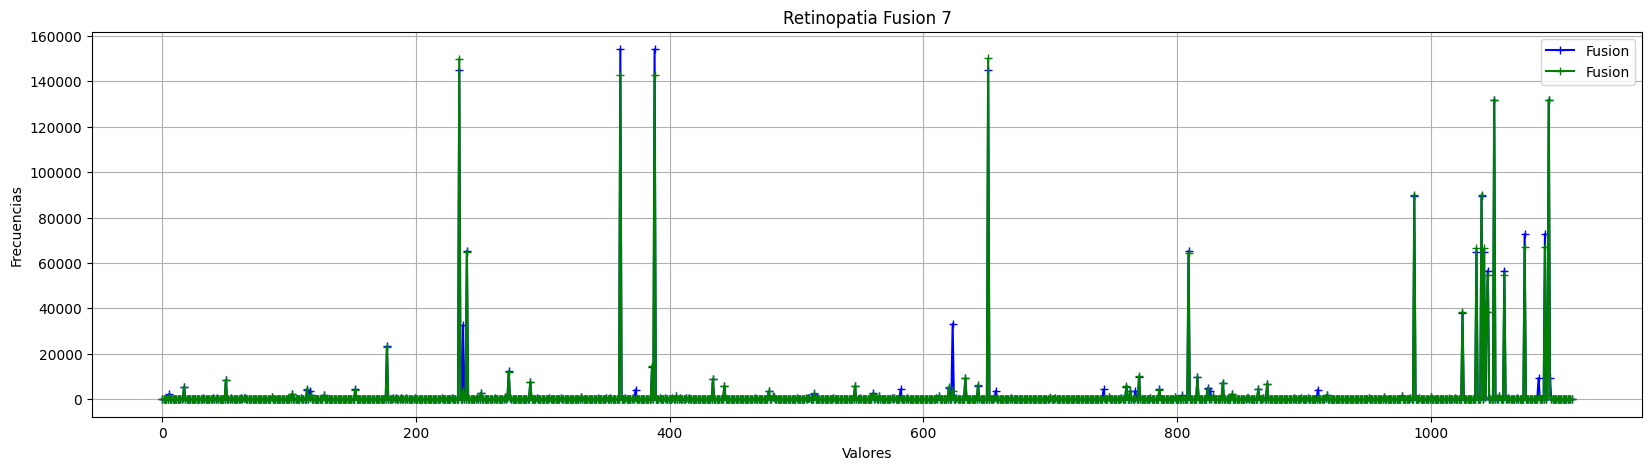

In [61]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_7['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_7['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 7')
plt.grid(True)
plt.legend()
plt.show()

In [70]:
fusion_8 = retinopatia.drop(columns = ['health.status'])
for item in fusion_8:
  if item != 'f_000036' and item != 'f_000037' and item != 'f_000038' and item != 'f_000039' and item != 'f_000040':
    fusion_8 = fusion_8.drop(columns = [item])
fusion_8

,f_000036,f_000037,f_000038,f_000039,f_000040
0,7.822033,8.432037,8.966002,8.854863,8.053533
1,29.201079,24.379351,20.614008,17.535864,14.726617
2,1.697381,1.542874,1.424105,1.376683,1.399134
3,5.506889,5.598455,5.940639,6.219020,6.214191
4,42.280822,40.239535,37.381888,34.052369,30.534896
...,...,...,...,...,...
1107,3.767112,3.165291,2.561859,2.092851,1.786290
1108,44.505412,32.573907,23.165087,16.614870,12.411825
1109,22.392656,19.236309,16.563139,14.435671,12.660111
1110,64.889483,60.028972,53.173715,45.655058,40.471881


In [71]:
# En caso de tener valores nulos
fusion_8 = fusion_8.dropna()
fusion_8

,f_000036,f_000037,f_000038,f_000039,f_000040
0,7.822033,8.432037,8.966002,8.854863,8.053533
1,29.201079,24.379351,20.614008,17.535864,14.726617
2,1.697381,1.542874,1.424105,1.376683,1.399134
3,5.506889,5.598455,5.940639,6.219020,6.214191
4,42.280822,40.239535,37.381888,34.052369,30.534896
...,...,...,...,...,...
1107,3.767112,3.165291,2.561859,2.092851,1.786290
1108,44.505412,32.573907,23.165087,16.614870,12.411825
1109,22.392656,19.236309,16.563139,14.435671,12.660111
1110,64.889483,60.028972,53.173715,45.655058,40.471881


In [72]:
#Promedio
promedio_simple = fusion_8.loc[: , 'f_000036':'f_000040']
fusion_8['Media'] = promedio_simple.mean(axis='columns')
fusion_8

,f_000036,f_000037,f_000038,f_000039,f_000040,Media
0,7.822033,8.432037,8.966002,8.854863,8.053533,8.425694
1,29.201079,24.379351,20.614008,17.535864,14.726617,21.291384
2,1.697381,1.542874,1.424105,1.376683,1.399134,1.488035
3,5.506889,5.598455,5.940639,6.219020,6.214191,5.895839
4,42.280822,40.239535,37.381888,34.052369,30.534896,36.897902
...,...,...,...,...,...,...
1107,3.767112,3.165291,2.561859,2.092851,1.786290,2.674681
1108,44.505412,32.573907,23.165087,16.614870,12.411825,25.854220
1109,22.392656,19.236309,16.563139,14.435671,12.660111,17.057577
1110,64.889483,60.028972,53.173715,45.655058,40.471881,52.843822


In [73]:
#Mediana
mediana = fusion_8.loc[: , 'f_000036':'f_000040']
fusion_8['Mediana'] = mediana.median(axis='columns')
fusion_8

,f_000036,f_000037,f_000038,f_000039,f_000040,Media,Mediana
0,7.822033,8.432037,8.966002,8.854863,8.053533,8.425694,8.432037
1,29.201079,24.379351,20.614008,17.535864,14.726617,21.291384,20.614008
2,1.697381,1.542874,1.424105,1.376683,1.399134,1.488035,1.424105
3,5.506889,5.598455,5.940639,6.219020,6.214191,5.895839,5.940639
4,42.280822,40.239535,37.381888,34.052369,30.534896,36.897902,37.381888
...,...,...,...,...,...,...,...
1107,3.767112,3.165291,2.561859,2.092851,1.786290,2.674681,2.561859
1108,44.505412,32.573907,23.165087,16.614870,12.411825,25.854220,23.165087
1109,22.392656,19.236309,16.563139,14.435671,12.660111,17.057577,16.563139
1110,64.889483,60.028972,53.173715,45.655058,40.471881,52.843822,53.173715


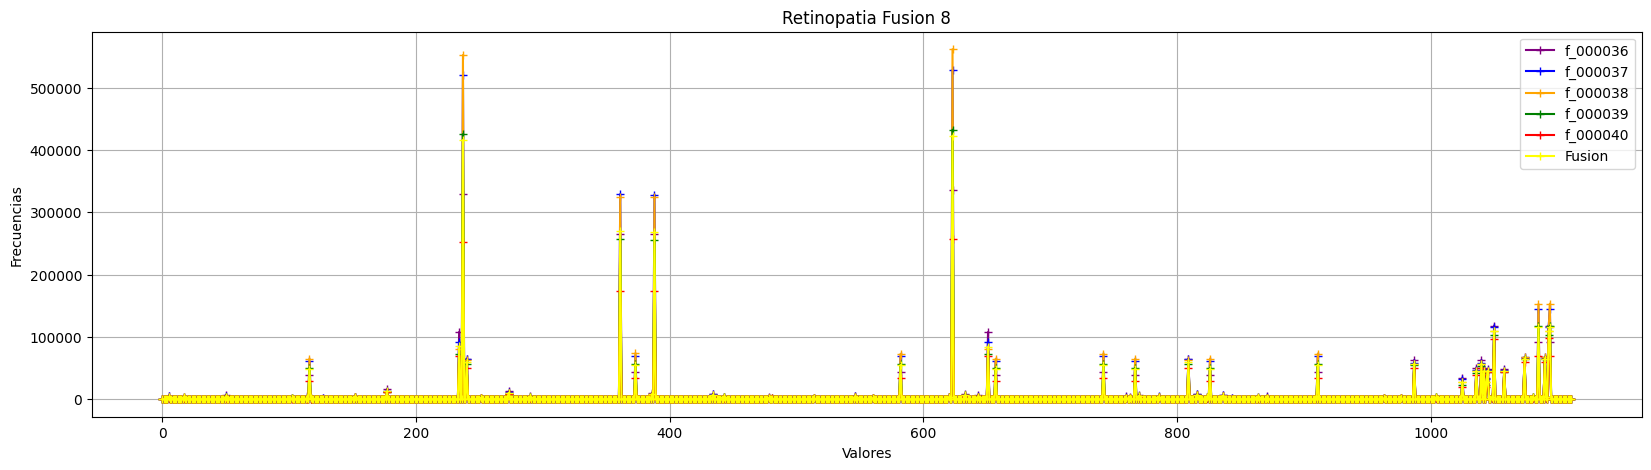

In [74]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_8['f_000036'], color='purple', marker='+', label='f_000036')
plt.plot(fusion_8['f_000037'], color='blue', marker='+', label='f_000037')
plt.plot(fusion_8['f_000038'], color='orange', marker='+', label='f_000038')
plt.plot(fusion_8['f_000039'], color='green', marker='+', label='f_000039')
plt.plot(fusion_8['f_000040'], color='red', marker='+', label='f_000040')
plt.plot(fusion_8['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 8')
plt.grid(True)
plt.legend()
plt.show()

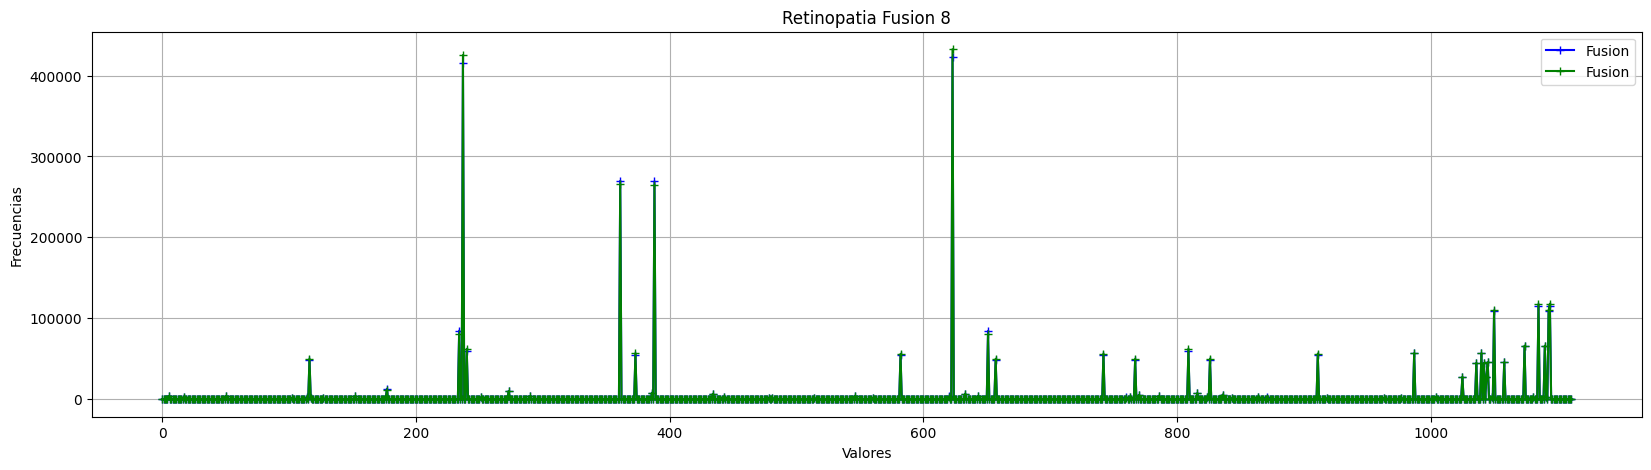

In [75]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_8['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_8['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 8')
plt.grid(True)
plt.legend()
plt.show()

In [76]:
fusion_9 = retinopatia.drop(columns = ['health.status'])
for item in fusion_9:
  if item != 'f_000041' and item != 'f_000042' and item != 'f_000043' and item != 'f_000044' and item != 'f_000045':
    fusion_9 = fusion_9.drop(columns = [item])
fusion_9

,f_000041,f_000042,f_000043,f_000044,f_000045
0,6.923552,5.743892,4.597154,3.534539,2.634310
1,11.909529,9.153003,6.774462,5.009367,3.849724
2,1.470060,1.576703,1.718759,1.917987,2.232904
3,5.960877,5.605199,5.262564,5.061426,5.142893
4,26.900017,23.172090,19.511589,16.223607,13.566338
...,...,...,...,...,...
1107,1.582758,1.437677,1.353431,1.330503,1.333540
1108,9.708407,7.851625,6.487753,5.448671,4.642167
1109,11.051755,9.643925,8.525594,7.582187,6.577422
1110,38.731026,38.650873,37.623436,34.311953,29.232103


In [77]:
# En caso de tener valores nulos
fusion_9 = fusion_9.dropna()
fusion_9

,f_000041,f_000042,f_000043,f_000044,f_000045
0,6.923552,5.743892,4.597154,3.534539,2.634310
1,11.909529,9.153003,6.774462,5.009367,3.849724
2,1.470060,1.576703,1.718759,1.917987,2.232904
3,5.960877,5.605199,5.262564,5.061426,5.142893
4,26.900017,23.172090,19.511589,16.223607,13.566338
...,...,...,...,...,...
1107,1.582758,1.437677,1.353431,1.330503,1.333540
1108,9.708407,7.851625,6.487753,5.448671,4.642167
1109,11.051755,9.643925,8.525594,7.582187,6.577422
1110,38.731026,38.650873,37.623436,34.311953,29.232103


In [78]:
#Promedio
promedio_simple = fusion_9.loc[: , 'f_000041':'f_000045']
fusion_9['Media'] = promedio_simple.mean(axis='columns')
fusion_9

,f_000041,f_000042,f_000043,f_000044,f_000045,Media
0,6.923552,5.743892,4.597154,3.534539,2.634310,4.686689
1,11.909529,9.153003,6.774462,5.009367,3.849724,7.339217
2,1.470060,1.576703,1.718759,1.917987,2.232904,1.783283
3,5.960877,5.605199,5.262564,5.061426,5.142893,5.406592
4,26.900017,23.172090,19.511589,16.223607,13.566338,19.874728
...,...,...,...,...,...,...
1107,1.582758,1.437677,1.353431,1.330503,1.333540,1.407582
1108,9.708407,7.851625,6.487753,5.448671,4.642167,6.827725
1109,11.051755,9.643925,8.525594,7.582187,6.577422,8.676177
1110,38.731026,38.650873,37.623436,34.311953,29.232103,35.709878


In [80]:
#Mediana
mediana = fusion_9.loc[: , 'f_000041':'f_000045']
fusion_9['Mediana'] = mediana.median(axis='columns')
fusion_9

,f_000041,f_000042,f_000043,f_000044,f_000045,Media,Mediana
0,6.923552,5.743892,4.597154,3.534539,2.634310,4.686689,4.597154
1,11.909529,9.153003,6.774462,5.009367,3.849724,7.339217,6.774462
2,1.470060,1.576703,1.718759,1.917987,2.232904,1.783283,1.718759
3,5.960877,5.605199,5.262564,5.061426,5.142893,5.406592,5.262564
4,26.900017,23.172090,19.511589,16.223607,13.566338,19.874728,19.511589
...,...,...,...,...,...,...,...
1107,1.582758,1.437677,1.353431,1.330503,1.333540,1.407582,1.353431
1108,9.708407,7.851625,6.487753,5.448671,4.642167,6.827725,6.487753
1109,11.051755,9.643925,8.525594,7.582187,6.577422,8.676177,8.525594
1110,38.731026,38.650873,37.623436,34.311953,29.232103,35.709878,37.623436


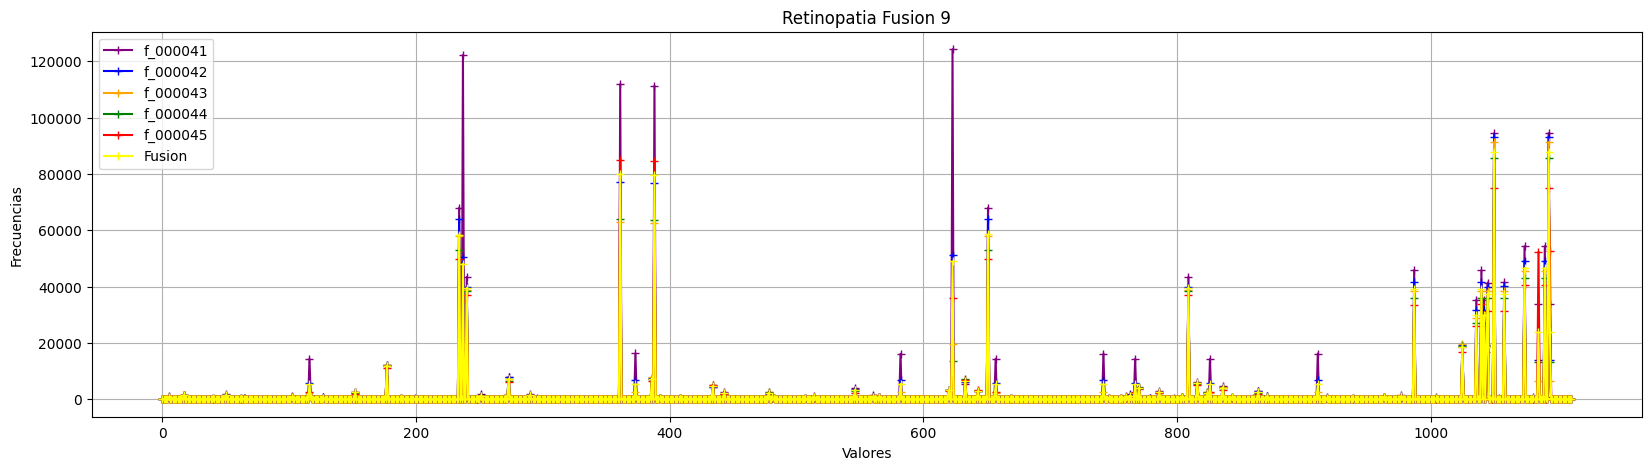

In [81]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_9['f_000041'], color='purple', marker='+', label='f_000041')
plt.plot(fusion_9['f_000042'], color='blue', marker='+', label='f_000042')
plt.plot(fusion_9['f_000043'], color='orange', marker='+', label='f_000043')
plt.plot(fusion_9['f_000044'], color='green', marker='+', label='f_000044')
plt.plot(fusion_9['f_000045'], color='red', marker='+', label='f_000045')
plt.plot(fusion_9['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 9')
plt.grid(True)
plt.legend()
plt.show()

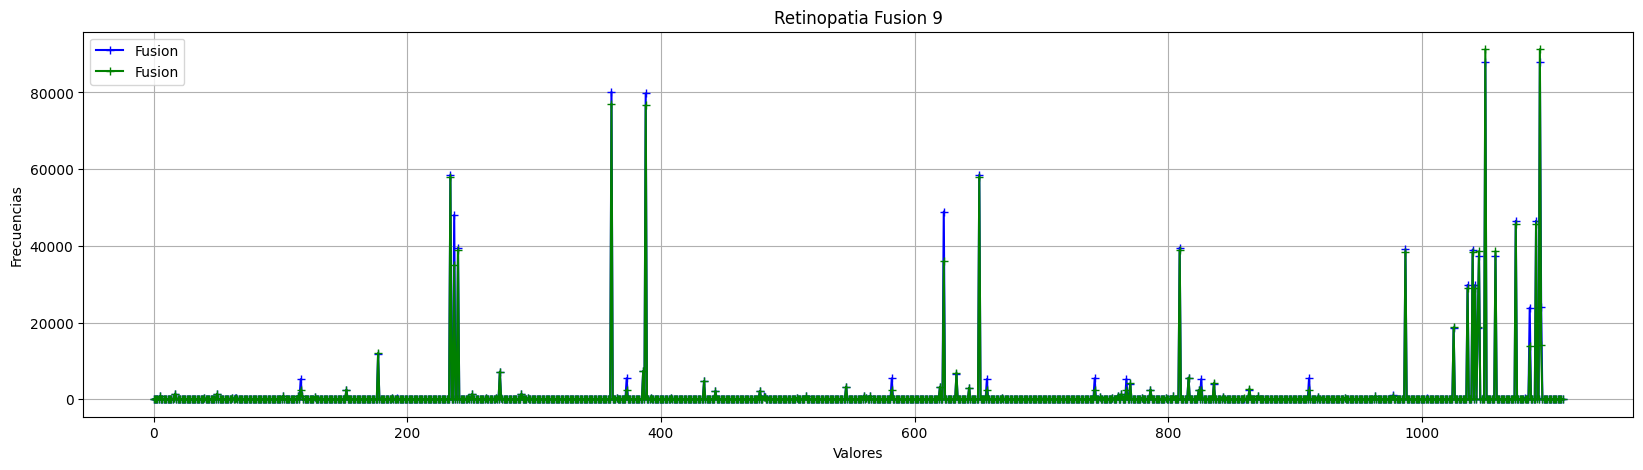

In [82]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_9['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_9['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 9')
plt.grid(True)
plt.legend()
plt.show()

In [83]:
fusion_10 = retinopatia.drop(columns = ['health.status'])
for item in fusion_10:
  if item != 'f_000046' and item != 'f_000047' and item != 'f_000048' and item != 'f_000049' and item != 'f_000050':
    fusion_10 = fusion_10.drop(columns = [item])
fusion_10

,f_000046,f_000047,f_000048,f_000049,f_000050
0,1.957077,1.513691,1.272717,1.182782,1.180153
1,3.157858,2.817106,2.738871,2.843716,3.113091
2,2.698093,3.263042,3.899701,4.729467,6.063193
3,5.525927,6.065086,6.578092,6.974030,7.346389
4,11.555355,9.993404,8.688451,7.594778,6.742445
...,...,...,...,...,...
1107,1.330318,1.352807,1.464609,1.663111,1.871900
1108,4.044418,3.703139,3.642680,3.782041,4.018735
1109,5.441874,4.338903,3.460811,2.846973,2.410213
1110,23.956388,19.773620,16.973590,15.151527,13.800786


In [84]:
# En caso de tener valores nulos
fusion_10 = fusion_10.dropna()
fusion_10

,f_000046,f_000047,f_000048,f_000049,f_000050
0,1.957077,1.513691,1.272717,1.182782,1.180153
1,3.157858,2.817106,2.738871,2.843716,3.113091
2,2.698093,3.263042,3.899701,4.729467,6.063193
3,5.525927,6.065086,6.578092,6.974030,7.346389
4,11.555355,9.993404,8.688451,7.594778,6.742445
...,...,...,...,...,...
1107,1.330318,1.352807,1.464609,1.663111,1.871900
1108,4.044418,3.703139,3.642680,3.782041,4.018735
1109,5.441874,4.338903,3.460811,2.846973,2.410213
1110,23.956388,19.773620,16.973590,15.151527,13.800786


In [85]:
#Promedio
promedio_simple = fusion_10.loc[: , 'f_000046':'f_000050']
fusion_10['Media'] = promedio_simple.mean(axis='columns')
fusion_10

,f_000046,f_000047,f_000048,f_000049,f_000050,Media
0,1.957077,1.513691,1.272717,1.182782,1.180153,1.421284
1,3.157858,2.817106,2.738871,2.843716,3.113091,2.934128
2,2.698093,3.263042,3.899701,4.729467,6.063193,4.130699
3,5.525927,6.065086,6.578092,6.974030,7.346389,6.497905
4,11.555355,9.993404,8.688451,7.594778,6.742445,8.914887
...,...,...,...,...,...,...
1107,1.330318,1.352807,1.464609,1.663111,1.871900,1.536549
1108,4.044418,3.703139,3.642680,3.782041,4.018735,3.838203
1109,5.441874,4.338903,3.460811,2.846973,2.410213,3.699755
1110,23.956388,19.773620,16.973590,15.151527,13.800786,17.931182


In [86]:
#Mediana
mediana = fusion_10.loc[: , 'f_000046':'f_000050']
fusion_10['Mediana'] = mediana.median(axis='columns')
fusion_10

,f_000046,f_000047,f_000048,f_000049,f_000050,Media,Mediana
0,1.957077,1.513691,1.272717,1.182782,1.180153,1.421284,1.272717
1,3.157858,2.817106,2.738871,2.843716,3.113091,2.934128,2.843716
2,2.698093,3.263042,3.899701,4.729467,6.063193,4.130699,3.899701
3,5.525927,6.065086,6.578092,6.974030,7.346389,6.497905,6.578092
4,11.555355,9.993404,8.688451,7.594778,6.742445,8.914887,8.688451
...,...,...,...,...,...,...,...
1107,1.330318,1.352807,1.464609,1.663111,1.871900,1.536549,1.464609
1108,4.044418,3.703139,3.642680,3.782041,4.018735,3.838203,3.782041
1109,5.441874,4.338903,3.460811,2.846973,2.410213,3.699755,3.460811
1110,23.956388,19.773620,16.973590,15.151527,13.800786,17.931182,16.973590


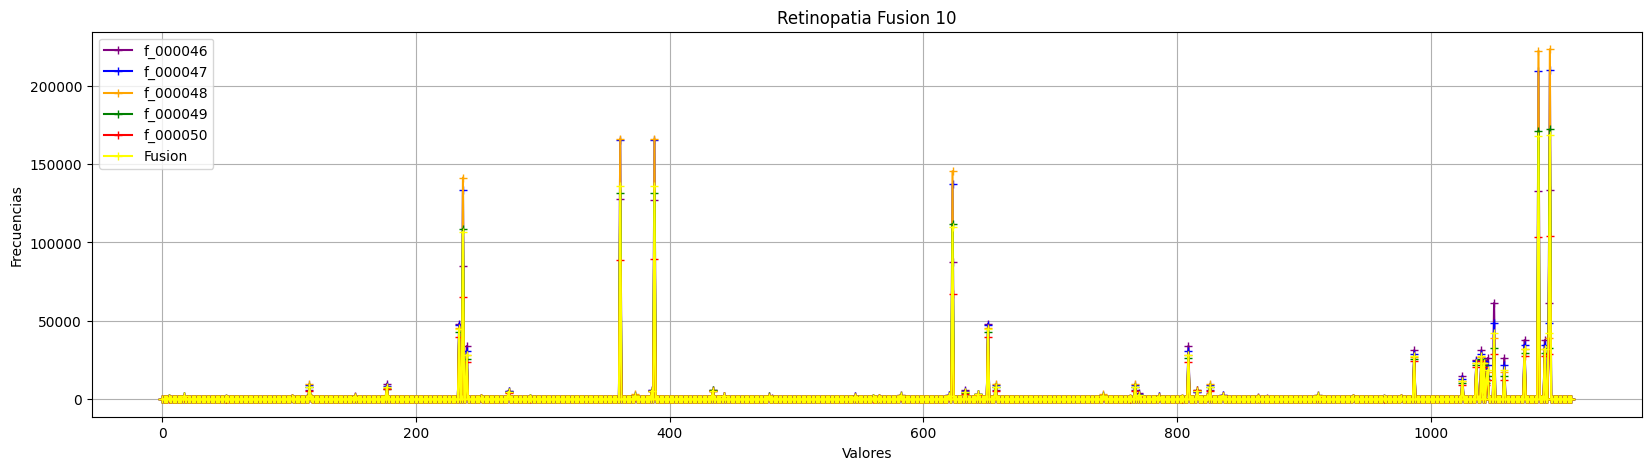

In [87]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_10['f_000046'], color='purple', marker='+', label='f_000046')
plt.plot(fusion_10['f_000047'], color='blue', marker='+', label='f_000047')
plt.plot(fusion_10['f_000048'], color='orange', marker='+', label='f_000048')
plt.plot(fusion_10['f_000049'], color='green', marker='+', label='f_000049')
plt.plot(fusion_10['f_000050'], color='red', marker='+', label='f_000050')
plt.plot(fusion_10['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 10')
plt.grid(True)
plt.legend()
plt.show()

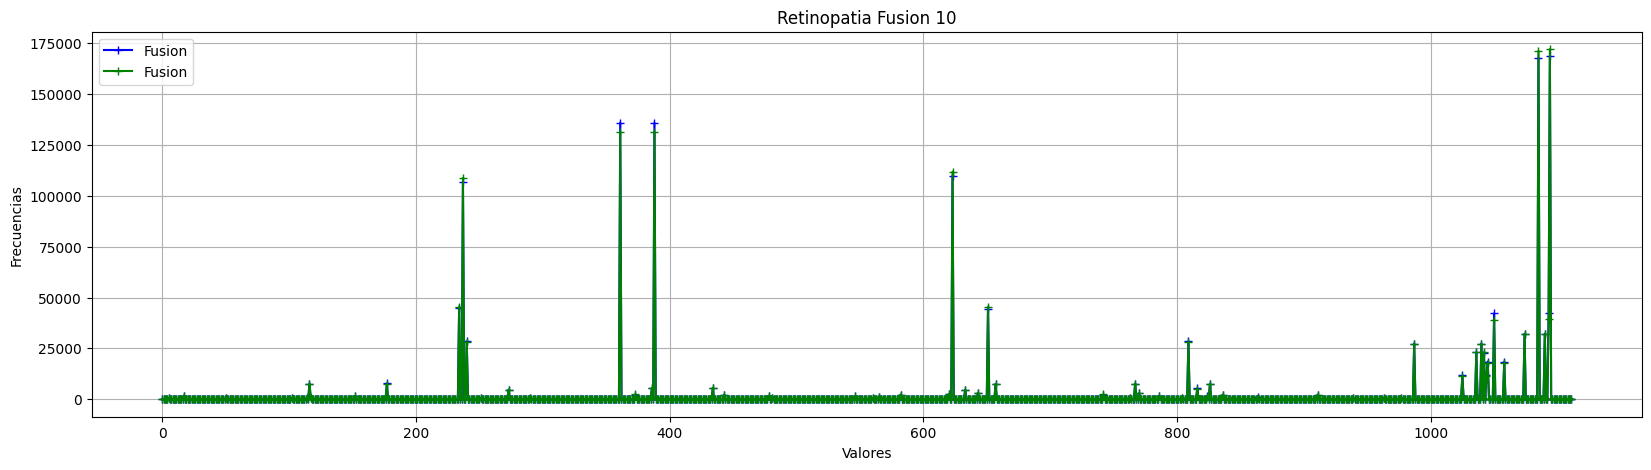

In [88]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_10['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_10['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 10')
plt.grid(True)
plt.legend()
plt.show()

In [89]:
fusion_11 = retinopatia.drop(columns = ['health.status'])
for item in fusion_11:
  if item != 'f_000051' and item != 'f_000052' and item != 'f_000053' and item != 'f_000054' and item != 'f_000055':
    fusion_11 = fusion_11.drop(columns = [item])
fusion_11

,f_000051,f_000052,f_000053,f_000054,f_000055
0,1.204269,1.233572,1.299956,1.461832,1.751747
1,3.582889,4.267022,5.139913,6.150452,7.210278
2,8.379165,11.973760,16.496703,21.224623,25.817942
3,7.939512,8.916754,10.153103,11.348037,12.380240
4,6.171104,5.903239,5.853361,5.856699,5.848294
...,...,...,...,...,...
1107,2.022155,2.093694,2.097731,2.077655,2.111817
1108,4.369374,4.958436,5.870125,7.071259,8.439281
1109,2.066788,1.808427,1.666037,1.640288,1.697894
1110,12.595333,11.498521,10.767776,10.750193,11.600004


In [90]:
# En caso de tener valores nulos
fusion_11 = fusion_11.dropna()
fusion_11

,f_000051,f_000052,f_000053,f_000054,f_000055
0,1.204269,1.233572,1.299956,1.461832,1.751747
1,3.582889,4.267022,5.139913,6.150452,7.210278
2,8.379165,11.973760,16.496703,21.224623,25.817942
3,7.939512,8.916754,10.153103,11.348037,12.380240
4,6.171104,5.903239,5.853361,5.856699,5.848294
...,...,...,...,...,...
1107,2.022155,2.093694,2.097731,2.077655,2.111817
1108,4.369374,4.958436,5.870125,7.071259,8.439281
1109,2.066788,1.808427,1.666037,1.640288,1.697894
1110,12.595333,11.498521,10.767776,10.750193,11.600004


In [91]:
#Promedio
promedio_simple = fusion_11.loc[: , 'f_000051':'f_000055']
fusion_11['Media'] = promedio_simple.mean(axis='columns')
fusion_11

,f_000051,f_000052,f_000053,f_000054,f_000055,Media
0,1.204269,1.233572,1.299956,1.461832,1.751747,1.390275
1,3.582889,4.267022,5.139913,6.150452,7.210278,5.270111
2,8.379165,11.973760,16.496703,21.224623,25.817942,16.778438
3,7.939512,8.916754,10.153103,11.348037,12.380240,10.147529
4,6.171104,5.903239,5.853361,5.856699,5.848294,5.926539
...,...,...,...,...,...,...
1107,2.022155,2.093694,2.097731,2.077655,2.111817,2.080610
1108,4.369374,4.958436,5.870125,7.071259,8.439281,6.141695
1109,2.066788,1.808427,1.666037,1.640288,1.697894,1.775887
1110,12.595333,11.498521,10.767776,10.750193,11.600004,11.442365


In [92]:
#Mediana
mediana = fusion_11.loc[: , 'f_000051':'f_000055']
fusion_11['Mediana'] = mediana.median(axis='columns')
fusion_11

,f_000051,f_000052,f_000053,f_000054,f_000055,Media,Mediana
0,1.204269,1.233572,1.299956,1.461832,1.751747,1.390275,1.299956
1,3.582889,4.267022,5.139913,6.150452,7.210278,5.270111,5.139913
2,8.379165,11.973760,16.496703,21.224623,25.817942,16.778438,16.496703
3,7.939512,8.916754,10.153103,11.348037,12.380240,10.147529,10.153103
4,6.171104,5.903239,5.853361,5.856699,5.848294,5.926539,5.856699
...,...,...,...,...,...,...,...
1107,2.022155,2.093694,2.097731,2.077655,2.111817,2.080610,2.093694
1108,4.369374,4.958436,5.870125,7.071259,8.439281,6.141695,5.870125
1109,2.066788,1.808427,1.666037,1.640288,1.697894,1.775887,1.697894
1110,12.595333,11.498521,10.767776,10.750193,11.600004,11.442365,11.498521


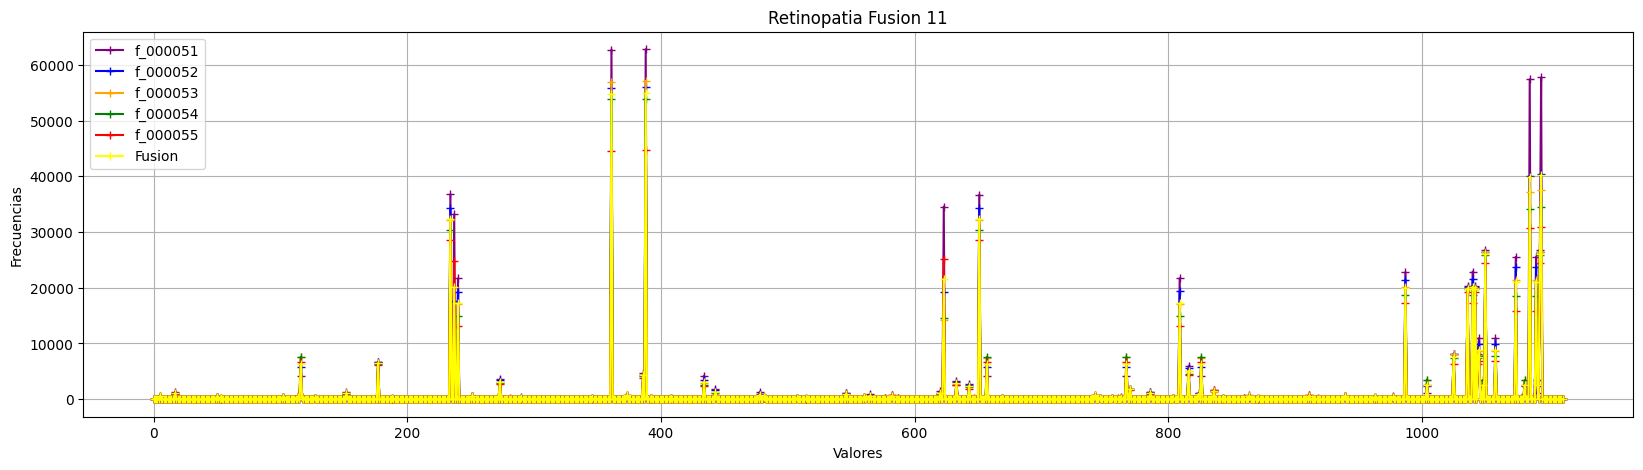

In [93]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_11['f_000051'], color='purple', marker='+', label='f_000051')
plt.plot(fusion_11['f_000052'], color='blue', marker='+', label='f_000052')
plt.plot(fusion_11['f_000053'], color='orange', marker='+', label='f_000053')
plt.plot(fusion_11['f_000054'], color='green', marker='+', label='f_000054')
plt.plot(fusion_11['f_000055'], color='red', marker='+', label='f_000055')
plt.plot(fusion_11['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 11')
plt.grid(True)
plt.legend()
plt.show()

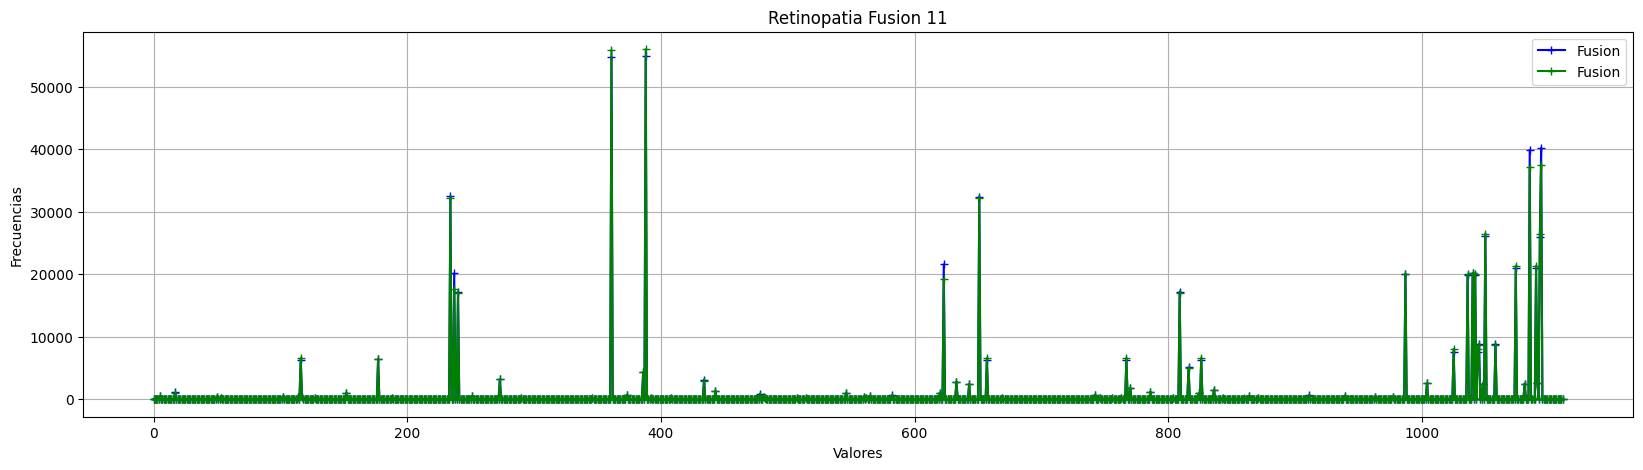

In [94]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_11['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_11['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 11')
plt.grid(True)
plt.legend()
plt.show()

In [95]:
fusion_12 = retinopatia.drop(columns = ['health.status'])
for item in fusion_12:
  if item != 'f_000056' and item != 'f_000057' and item != 'f_000058' and item != 'f_000059' and item != 'f_000060':
    fusion_12 = fusion_12.drop(columns = [item])
fusion_12

,f_000056,f_000057,f_000058,f_000059,f_000060
0,2.134062,2.519550,2.834873,3.061652,3.215614
1,8.263301,9.395709,10.790414,12.485256,14.183640
2,30.247725,34.067214,36.391320,36.700229,35.636881
3,13.327741,14.168479,14.854774,15.550899,16.530579
4,5.873804,5.955361,6.080338,6.257279,6.552022
...,...,...,...,...,...
1107,2.254846,2.499580,2.798777,3.074548,3.254760
1108,9.789772,10.939178,11.815801,12.551275,13.438486
1109,1.794705,1.882559,1.933021,1.954849,1.978402
1110,13.221105,15.372854,17.698683,19.874441,21.767504


In [96]:
# En caso de tener valores nulos
fusion_12 = fusion_12.dropna()
fusion_12

,f_000056,f_000057,f_000058,f_000059,f_000060
0,2.134062,2.519550,2.834873,3.061652,3.215614
1,8.263301,9.395709,10.790414,12.485256,14.183640
2,30.247725,34.067214,36.391320,36.700229,35.636881
3,13.327741,14.168479,14.854774,15.550899,16.530579
4,5.873804,5.955361,6.080338,6.257279,6.552022
...,...,...,...,...,...
1107,2.254846,2.499580,2.798777,3.074548,3.254760
1108,9.789772,10.939178,11.815801,12.551275,13.438486
1109,1.794705,1.882559,1.933021,1.954849,1.978402
1110,13.221105,15.372854,17.698683,19.874441,21.767504


In [97]:
#Promedio
promedio_simple = fusion_12.loc[: , 'f_000056':'f_000060']
fusion_12['Media'] = promedio_simple.mean(axis='columns')
fusion_12

,f_000056,f_000057,f_000058,f_000059,f_000060,Media
0,2.134062,2.519550,2.834873,3.061652,3.215614,2.753150
1,8.263301,9.395709,10.790414,12.485256,14.183640,11.023664
2,30.247725,34.067214,36.391320,36.700229,35.636881,34.608674
3,13.327741,14.168479,14.854774,15.550899,16.530579,14.886494
4,5.873804,5.955361,6.080338,6.257279,6.552022,6.143761
...,...,...,...,...,...,...
1107,2.254846,2.499580,2.798777,3.074548,3.254760,2.776502
1108,9.789772,10.939178,11.815801,12.551275,13.438486,11.706902
1109,1.794705,1.882559,1.933021,1.954849,1.978402,1.908707
1110,13.221105,15.372854,17.698683,19.874441,21.767504,17.586917


In [98]:
#Mediana
mediana = fusion_12.loc[: , 'f_000056':'f_000060']
fusion_12['Mediana'] = mediana.median(axis='columns')
fusion_12

,f_000056,f_000057,f_000058,f_000059,f_000060,Media,Mediana
0,2.134062,2.519550,2.834873,3.061652,3.215614,2.753150,2.834873
1,8.263301,9.395709,10.790414,12.485256,14.183640,11.023664,10.790414
2,30.247725,34.067214,36.391320,36.700229,35.636881,34.608674,35.636881
3,13.327741,14.168479,14.854774,15.550899,16.530579,14.886494,14.854774
4,5.873804,5.955361,6.080338,6.257279,6.552022,6.143761,6.080338
...,...,...,...,...,...,...,...
1107,2.254846,2.499580,2.798777,3.074548,3.254760,2.776502,2.798777
1108,9.789772,10.939178,11.815801,12.551275,13.438486,11.706902,11.815801
1109,1.794705,1.882559,1.933021,1.954849,1.978402,1.908707,1.933021
1110,13.221105,15.372854,17.698683,19.874441,21.767504,17.586917,17.698683


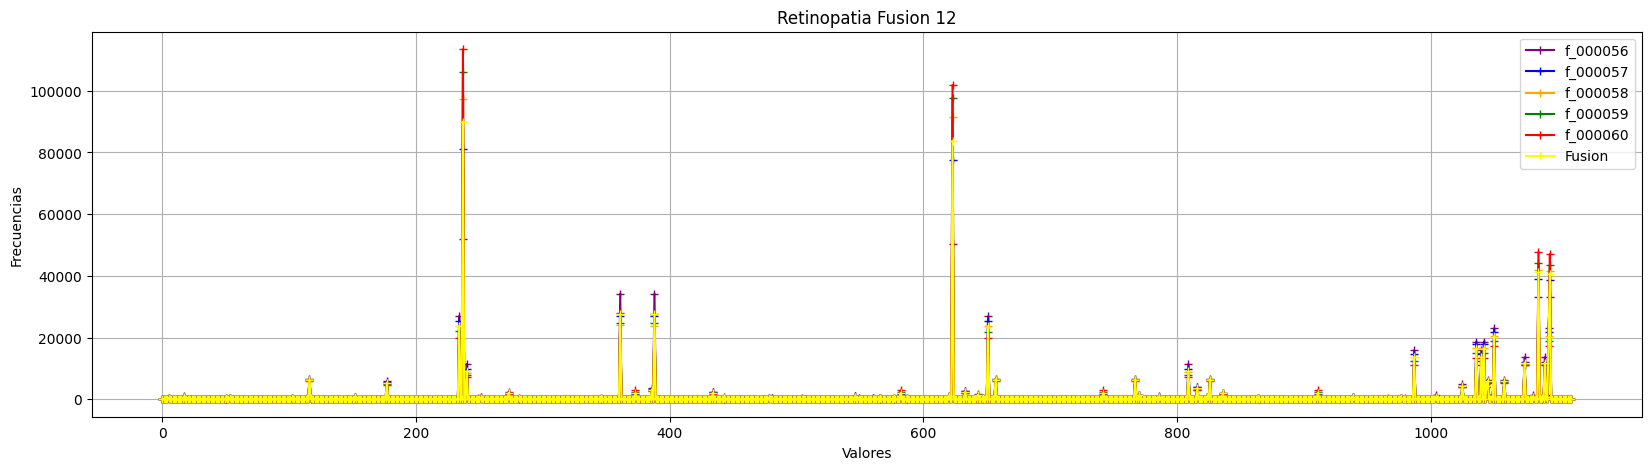

In [99]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_12['f_000056'], color='purple', marker='+', label='f_000056')
plt.plot(fusion_12['f_000057'], color='blue', marker='+', label='f_000057')
plt.plot(fusion_12['f_000058'], color='orange', marker='+', label='f_000058')
plt.plot(fusion_12['f_000059'], color='green', marker='+', label='f_000059')
plt.plot(fusion_12['f_000060'], color='red', marker='+', label='f_000060')
plt.plot(fusion_12['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 12')
plt.grid(True)
plt.legend()
plt.show()

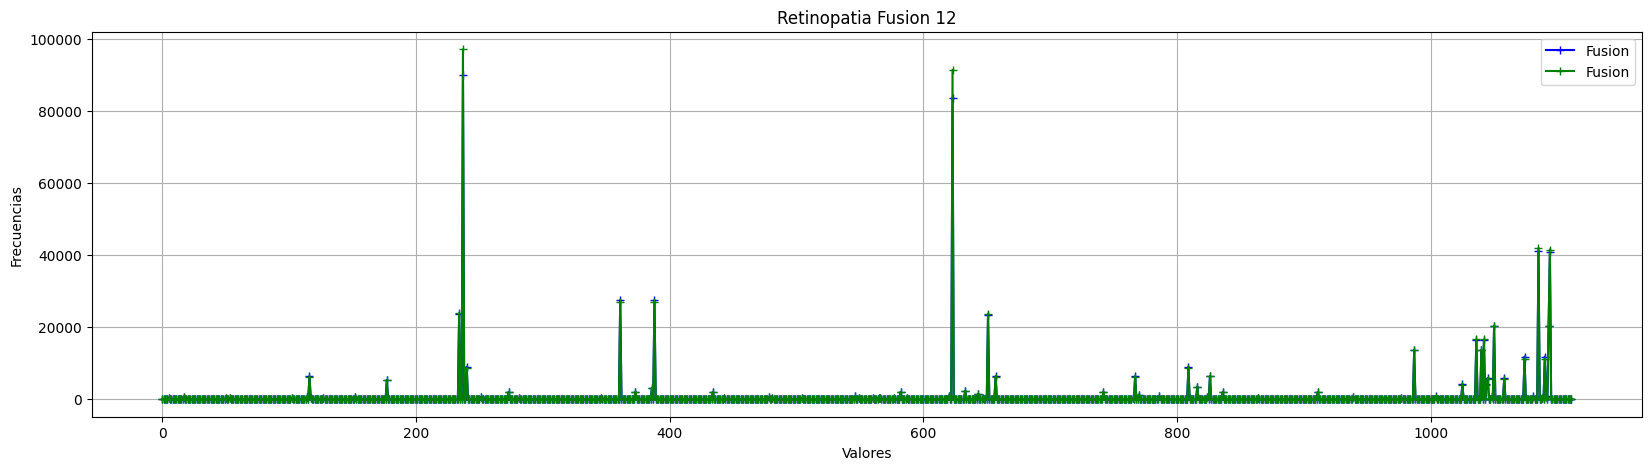

In [100]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_12['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_12['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 12')
plt.grid(True)
plt.legend()
plt.show()

In [101]:
fusion_13 = retinopatia.drop(columns = ['health.status'])
for item in fusion_13:
  if item != 'f_000061' and item != 'f_000062' and item != 'f_000063' and item != 'f_000064' and item != 'f_000065':
    fusion_13 = fusion_13.drop(columns = [item])
fusion_13

,f_000061,f_000062,f_000063,f_000064,f_000065
0,3.332748,3.480402,3.854307,5.245511,9.215420
1,15.576554,16.825167,18.315843,20.076293,21.848763
2,34.657351,34.727477,35.977187,38.361017,41.693322
3,18.014346,20.047497,22.536181,25.359234,28.353100
4,7.042471,7.696502,8.379038,8.982337,9.471419
...,...,...,...,...,...
1107,3.341653,3.410566,3.541230,3.752837,3.991767
1108,14.687543,16.202893,17.692761,19.226280,21.524516
1109,2.039017,2.153674,2.299899,2.457559,2.662999
1110,23.274529,24.340751,25.133467,25.785277,26.281525


In [102]:
# En caso de tener valores nulos
fusion_13 = fusion_13.dropna()
fusion_13

,f_000061,f_000062,f_000063,f_000064,f_000065
0,3.332748,3.480402,3.854307,5.245511,9.215420
1,15.576554,16.825167,18.315843,20.076293,21.848763
2,34.657351,34.727477,35.977187,38.361017,41.693322
3,18.014346,20.047497,22.536181,25.359234,28.353100
4,7.042471,7.696502,8.379038,8.982337,9.471419
...,...,...,...,...,...
1107,3.341653,3.410566,3.541230,3.752837,3.991767
1108,14.687543,16.202893,17.692761,19.226280,21.524516
1109,2.039017,2.153674,2.299899,2.457559,2.662999
1110,23.274529,24.340751,25.133467,25.785277,26.281525


In [103]:
#Promedio
promedio_simple = fusion_13.loc[: , 'f_000061':'f_000065']
fusion_13['Media'] = promedio_simple.mean(axis='columns')
fusion_13

,f_000061,f_000062,f_000063,f_000064,f_000065,Media
0,3.332748,3.480402,3.854307,5.245511,9.215420,5.025678
1,15.576554,16.825167,18.315843,20.076293,21.848763,18.528524
2,34.657351,34.727477,35.977187,38.361017,41.693322,37.083271
3,18.014346,20.047497,22.536181,25.359234,28.353100,22.862072
4,7.042471,7.696502,8.379038,8.982337,9.471419,8.314353
...,...,...,...,...,...,...
1107,3.341653,3.410566,3.541230,3.752837,3.991767,3.607611
1108,14.687543,16.202893,17.692761,19.226280,21.524516,17.866799
1109,2.039017,2.153674,2.299899,2.457559,2.662999,2.322630
1110,23.274529,24.340751,25.133467,25.785277,26.281525,24.963110


In [104]:
#Mediana
mediana = fusion_13.loc[: , 'f_000061':'f_000065']
fusion_13['Mediana'] = mediana.median(axis='columns')
fusion_13

,f_000061,f_000062,f_000063,f_000064,f_000065,Media,Mediana
0,3.332748,3.480402,3.854307,5.245511,9.215420,5.025678,3.854307
1,15.576554,16.825167,18.315843,20.076293,21.848763,18.528524,18.315843
2,34.657351,34.727477,35.977187,38.361017,41.693322,37.083271,35.977187
3,18.014346,20.047497,22.536181,25.359234,28.353100,22.862072,22.536181
4,7.042471,7.696502,8.379038,8.982337,9.471419,8.314353,8.379038
...,...,...,...,...,...,...,...
1107,3.341653,3.410566,3.541230,3.752837,3.991767,3.607611,3.541230
1108,14.687543,16.202893,17.692761,19.226280,21.524516,17.866799,17.692761
1109,2.039017,2.153674,2.299899,2.457559,2.662999,2.322630,2.299899
1110,23.274529,24.340751,25.133467,25.785277,26.281525,24.963110,25.133467


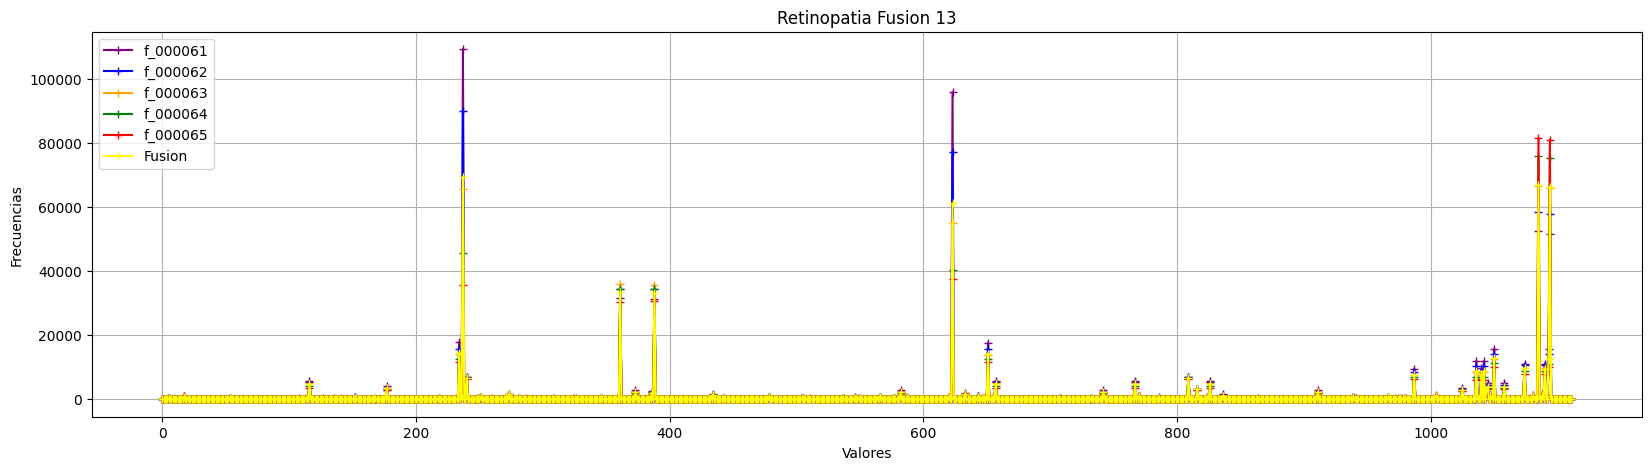

In [105]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_13['f_000061'], color='purple', marker='+', label='f_000061')
plt.plot(fusion_13['f_000062'], color='blue', marker='+', label='f_000062')
plt.plot(fusion_13['f_000063'], color='orange', marker='+', label='f_000063')
plt.plot(fusion_13['f_000064'], color='green', marker='+', label='f_000064')
plt.plot(fusion_13['f_000065'], color='red', marker='+', label='f_000065')
plt.plot(fusion_13['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 13')
plt.grid(True)
plt.legend()
plt.show()

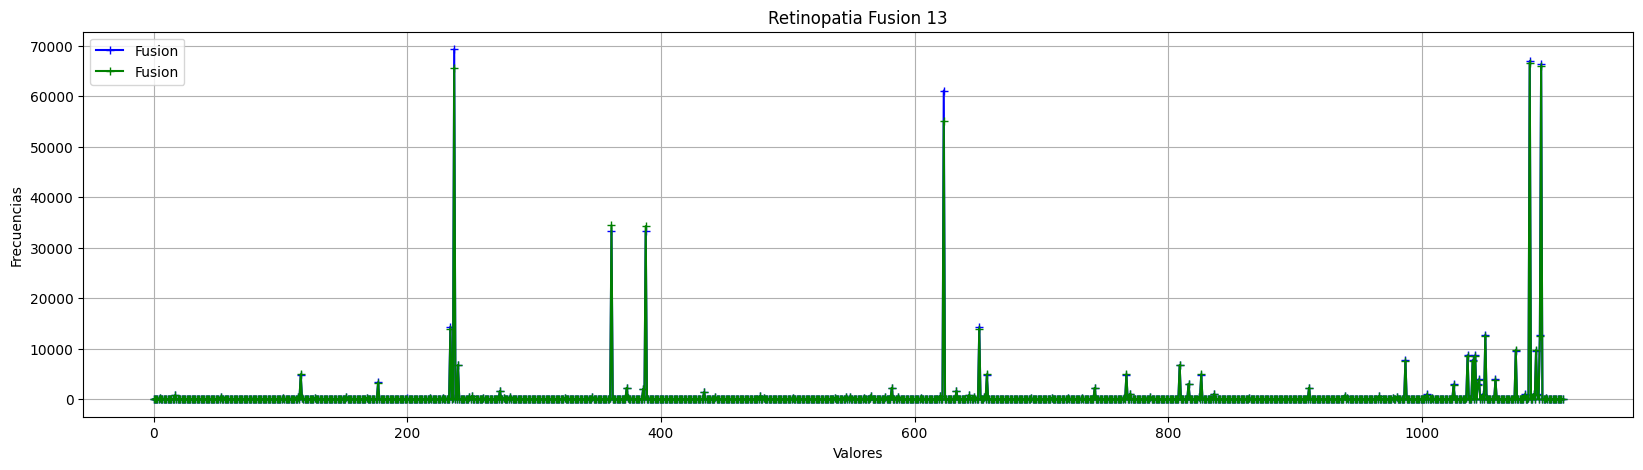

In [107]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_13['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_13['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 13')
plt.grid(True)
plt.legend()
plt.show()

In [108]:
fusion_14 = retinopatia.drop(columns = ['health.status'])
for item in fusion_14:
  if item != 'f_000066' and item != 'f_000067' and item != 'f_000068' and item != 'f_000069' and item != 'f_000070':
    fusion_14 = fusion_14.drop(columns = [item])
fusion_14

,f_000066,f_000067,f_000068,f_000069,f_000070
0,15.686887,20.877630,21.301055,17.878146,13.799770
1,23.448133,24.781314,25.852985,26.772444,27.510021
2,45.194320,47.899705,49.562395,50.450740,50.533996
3,31.507935,34.888351,38.140906,40.915108,43.514155
4,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...
1107,4.186375,4.322308,4.465974,4.699261,5.044514
1108,24.649297,26.917099,26.890498,25.170626,23.127421
1109,2.969399,3.374929,3.818873,4.224368,4.547494
1110,26.752091,27.452770,28.444717,29.522745,30.401168


In [109]:
# En caso de tener valores nulos
fusion_14 = fusion_14.dropna()
fusion_14

,f_000066,f_000067,f_000068,f_000069,f_000070
0,15.686887,20.877630,21.301055,17.878146,13.799770
1,23.448133,24.781314,25.852985,26.772444,27.510021
2,45.194320,47.899705,49.562395,50.450740,50.533996
3,31.507935,34.888351,38.140906,40.915108,43.514155
4,9.876325,10.282313,10.735607,11.146974,11.359566
...,...,...,...,...,...
1107,4.186375,4.322308,4.465974,4.699261,5.044514
1108,24.649297,26.917099,26.890498,25.170626,23.127421
1109,2.969399,3.374929,3.818873,4.224368,4.547494
1110,26.752091,27.452770,28.444717,29.522745,30.401168


In [110]:
#Promedio
promedio_simple = fusion_14.loc[: , 'f_000066':'f_000070']
fusion_14['Media'] = promedio_simple.mean(axis='columns')
fusion_14

,f_000066,f_000067,f_000068,f_000069,f_000070,Media
0,15.686887,20.877630,21.301055,17.878146,13.799770,17.908697
1,23.448133,24.781314,25.852985,26.772444,27.510021,25.672979
2,45.194320,47.899705,49.562395,50.450740,50.533996,48.728231
3,31.507935,34.888351,38.140906,40.915108,43.514155,37.793291
4,9.876325,10.282313,10.735607,11.146974,11.359566,10.680157
...,...,...,...,...,...,...
1107,4.186375,4.322308,4.465974,4.699261,5.044514,4.543686
1108,24.649297,26.917099,26.890498,25.170626,23.127421,25.350988
1109,2.969399,3.374929,3.818873,4.224368,4.547494,3.787013
1110,26.752091,27.452770,28.444717,29.522745,30.401168,28.514698


In [111]:
#Mediana
mediana = fusion_14.loc[: , 'f_000066':'f_000070']
fusion_14['Mediana'] = mediana.median(axis='columns')
fusion_14

,f_000066,f_000067,f_000068,f_000069,f_000070,Media,Mediana
0,15.686887,20.877630,21.301055,17.878146,13.799770,17.908697,17.878146
1,23.448133,24.781314,25.852985,26.772444,27.510021,25.672979,25.852985
2,45.194320,47.899705,49.562395,50.450740,50.533996,48.728231,49.562395
3,31.507935,34.888351,38.140906,40.915108,43.514155,37.793291,38.140906
4,9.876325,10.282313,10.735607,11.146974,11.359566,10.680157,10.735607
...,...,...,...,...,...,...,...
1107,4.186375,4.322308,4.465974,4.699261,5.044514,4.543686,4.465974
1108,24.649297,26.917099,26.890498,25.170626,23.127421,25.350988,25.170626
1109,2.969399,3.374929,3.818873,4.224368,4.547494,3.787013,3.818873
1110,26.752091,27.452770,28.444717,29.522745,30.401168,28.514698,28.444717


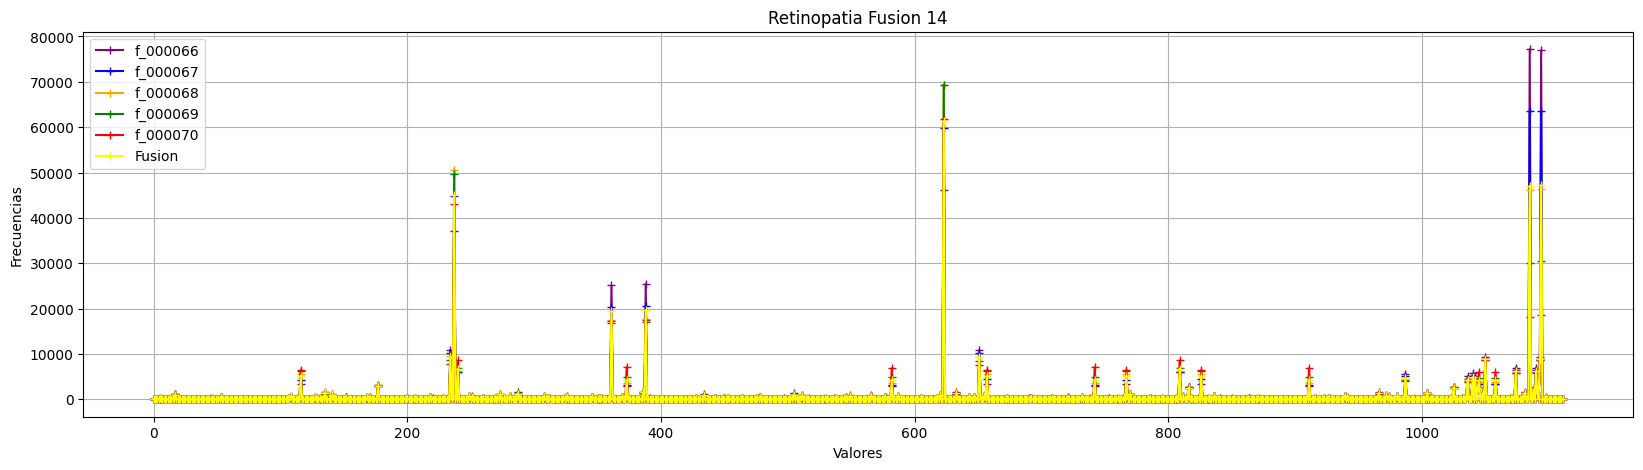

In [112]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_14['f_000066'], color='purple', marker='+', label='f_000066')
plt.plot(fusion_14['f_000067'], color='blue', marker='+', label='f_000067')
plt.plot(fusion_14['f_000068'], color='orange', marker='+', label='f_000068')
plt.plot(fusion_14['f_000069'], color='green', marker='+', label='f_000069')
plt.plot(fusion_14['f_000070'], color='red', marker='+', label='f_000070')
plt.plot(fusion_14['Media'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 14')
plt.grid(True)
plt.legend()
plt.show()

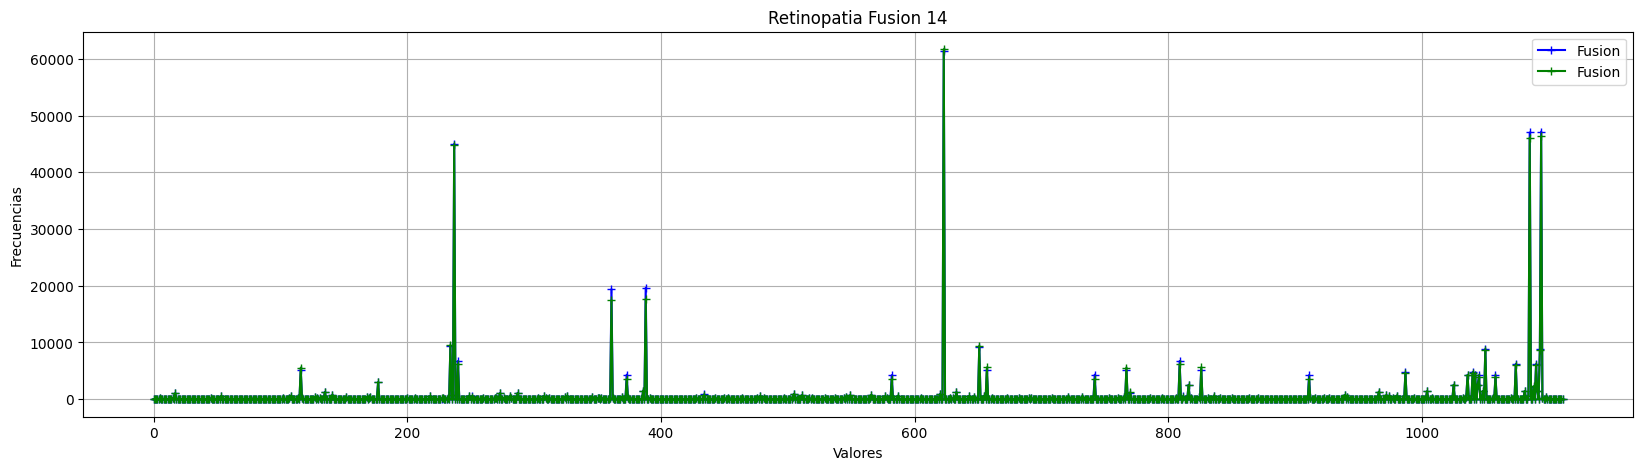

In [113]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_14['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_14['Mediana'], color='green', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 14')
plt.grid(True)
plt.legend()
plt.show()

### Fusion de datos mediante algoritmos de ML

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, max_error, r2_score 

In [63]:
x_train = np.array(fusion_1[['f_000001', 'f_000002', 'f_000003', 'f_000004']])
pd.DataFrame(x_train)

,0,1,2,3
0,2150.745881,1812.296506,1797.425232,2000.402651
1,201.462060,227.196312,239.527682,242.712595
2,57.266926,42.895909,37.259729,34.940005
3,229.556540,218.015928,229.962008,214.427812
4,94.251665,96.188890,101.315349,102.756134
...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800
1108,444.511027,430.493455,419.294383,427.814583
1109,253.650671,337.009270,426.335102,487.426947
1110,1322.642976,1282.723175,1302.099324,1320.569524


In [64]:
y_train = np.array(fusion_1[['f_000005']])
pd.DataFrame(y_train)

,0
0,2096.775161
1,233.877109
2,31.036661
3,169.474568
4,99.327028
...,...
1107,34.510788
1108,464.004222
1109,525.123416
1110,1337.036977


In [65]:
fusion_lineal = linear_model.LinearRegression()
fusion_lineal.fit(x_train, y_train) 

LinearRegression()

In [66]:
#Se genera la estimación
y_estimacion = fusion_lineal.predict(x_train)
pd.DataFrame(y_estimacion)

,0
0,2220.190601
1,240.093269
2,27.264120
3,153.998872
4,94.259153
...,...
1107,29.482106
1108,451.879799
1109,503.294415
1110,1300.272459


In [67]:
fusion_1['FusionLineal'] = y_estimacion
fusion_1

,f_000001,f_000002,f_000003,f_000004,f_000005,Media,Mediana,FusionLineal
0,2150.745881,1812.296506,1797.425232,2000.402651,2096.775161,1971.529086,2000.402651,2220.190601
1,201.462060,227.196312,239.527682,242.712595,233.877109,228.955152,233.877109,240.093269
2,57.266926,42.895909,37.259729,34.940005,31.036661,40.679846,37.259729,27.264120
3,229.556540,218.015928,229.962008,214.427812,169.474568,212.287371,218.015928,153.998872
4,94.251665,96.188890,101.315349,102.756134,99.327028,98.767813,99.327028,94.259153
...,...,...,...,...,...,...,...,...
1107,26.918454,30.309754,32.370351,33.266800,34.510788,31.475229,32.370351,29.482106
1108,444.511027,430.493455,419.294383,427.814583,464.004222,437.223534,430.493455,451.879799
1109,253.650671,337.009270,426.335102,487.426947,525.123416,405.909081,426.335102,503.294415
1110,1322.642976,1282.723175,1302.099324,1320.569524,1337.036977,1313.014395,1320.569524,1300.272459


In [68]:
print('Coeficientes: \n', fusion_lineal.coef_)
print('Intercepto: \n', fusion_lineal.intercept_)
print("MSE: %.4f" % mean_squared_error(y_train, y_estimacion))
print("RMSE: %.4f" % mean_squared_error(y_train, y_estimacion, squared=False))  #True devuelve MSE, False devuelve RMSE
print('Score (Bondad de ajuste): %.4f' % r2_score(y_train, y_estimacion))

Coeficientes: 
 [[-0.59246922  2.26339056 -3.60909381  2.94129534]]
Intercepto: 
 [-4.19220213]
MSE: 55316.4120
RMSE: 235.1944
Score (Bondad de ajuste): 0.9983


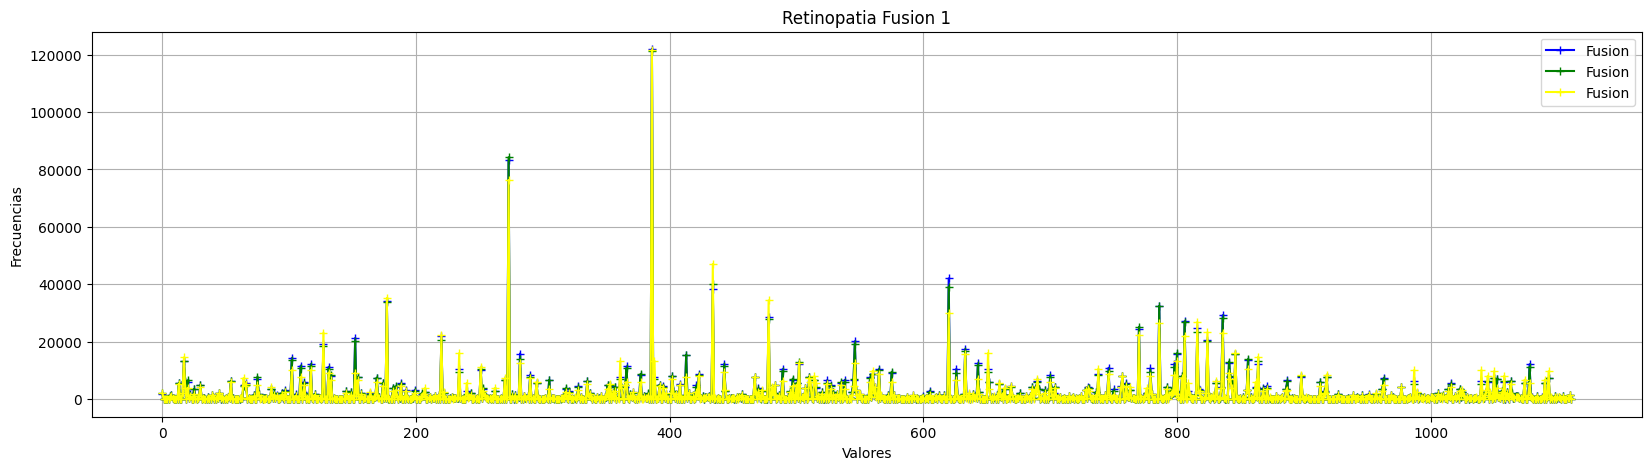

In [69]:
plt.figure(figsize=(20, 5))
plt.plot(fusion_1['Media'], color='blue', marker='+', label='Fusion')
plt.plot(fusion_1['Mediana'], color='green', marker='+', label='Fusion')
plt.plot(fusion_1['FusionLineal'], color='yellow', marker='+', label='Fusion')
plt.xlabel('Valores')
plt.ylabel('Frecuencias')
plt.title('Retinopatia Fusion 1')
plt.grid(True)
plt.legend()
plt.show()